## Data Analytics Problem: Predicting the offer winners on Amazon.


This task focuses on data exploration, data preparation and building and evaluating the prediction models for a particular problem and dataset. The problem and data comes from the Amazon online shopping platform. Several sellers can sell the same product on Amazon. Based on the data provided by the seller to Amazon (seller reputation, product price, shipping details, etc) Amazon ranks seller offers from best to worst for a given product. This ranking is mostly influenced by the product price offer of the seller, but it can also be influenced by other features. 

The goal is to explore and transform the data to try and understand which features are most indicative of a seller being ranked first by Amazon for a product. When the seller is ranked first for a product we say that the seller is the 'winner' among all the offers, because their offer is shown first when a user searches for a product on Amazon, which increases their chances of selling the product.

We need to work with the data to build and evaluate prediction models that capture the relationship between descriptive features and the target feature 'IsWinner'.



In [1]:
# Import package pandas for data analysis
import pandas as pd

# Import package numpy for numeric computing
import numpy as np

# Import package matplotlib for visualisation/plotting
import matplotlib.pyplot as plt

import matplotlib.patches as mpatches

import seaborn as sns

from matplotlib.backends.backend_pdf import PdfPages

#For showing plots directly in the notebook
%matplotlib inline

#Import pandas, numpy and matplotlib libraries
import math
import warnings
warnings.filterwarnings('ignore')
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.cross_validation import cross_val_score
from sklearn.feature_selection import f_regression
from sklearn.model_selection import GridSearchCV
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

#Import statsmodels package for training a linear regression model.
import statsmodels.formula.api as sm

pd.set_option('display.notebook_repr_html', True)


/Users/April/anaconda/envs/comp47350/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# 1.Getting Data

In [2]:
# Convert csv and json files into dataframes
df = pd.read_csv('amazon-offers-10k-samples-raw.csv')
df

,IsWinner,MarketplaceId,ProductId,TimeOfOfferChange,ConditionNotes,IsFeaturedMerchant,IsFulfilledByAmazon,ListingPrice,ListingCurrency,SellerFeedbackRating,...,SellerId,ShippingPrice,ShippingCurrency,ShippingTime_minHours,ShippingTime_maxHours,ShippingTime_availtype,ShipsDomestically,ShipsFromCountry,ShipsFromState,SubCondition
0,0,1156461832353164887,-4885255916155087854,2016-02-04T04:26:52.136Z,NaN,1,1,94.00,CAD,0,...,1207135739277432339,0.00,CAD,672,1008,NOW,1,NaN,NaN,new
1,1,1156461832353164887,-4885255916155087854,2016-02-04T04:26:52.136Z,Ready To Ship - We are unable to ship to PO Bo...,1,0,107.35,CAD,95,...,-1789487307643024748,0.00,CAD,48,72,NOW,1,CA,ON,new
2,0,1156461832353164887,-4885255916155087854,2016-02-04T04:26:52.136Z,.,1,0,100.46,CAD,98,...,5452082314297826053,6.99,CAD,24,48,NOW,1,CA,ON,new
3,0,1156461832353164887,-4885255916155087854,2016-02-04T04:26:52.136Z,Fast shipping in Canada.,1,0,99.24,CAD,95,...,-2572277640783537773,11.67,CAD,24,48,NOW,1,CA,ON,new
4,0,1156461832353164887,-4885255916155087854,2016-02-04T04:26:52.136Z,NaN,0,0,109.48,CAD,94,...,-8704029307873847986,8.99,CAD,24,48,NOW,1,CA,ON,new
5,0,1156461832353164887,-4885255916155087854,2016-02-04T04:26:52.136Z,NaN,0,0,116.70,CAD,67,...,1929046423112965216,6.98,CAD,24,48,NOW,1,CA,AB,new
6,0,1156461832353164887,-4885255916155087854,2016-02-04T04:26:52.136Z,*Free shipping from Canada / Livraison GRATUIT...,1,0,124.69,CAD,100,...,5657218934756058127,0.00,CAD,24,48,NOW,1,CA,ON,new
7,0,1156461832353164887,-4885255916155087854,2016-02-04T04:26:52.136Z,NaN,1,0,120.08,CAD,96,...,1788801474825896666,9.98,CAD,96,120,NOW,1,US,NY,new
8,0,1156461832353164887,-4885255916155087854,2016-02-04T04:26:52.136Z,BRAND NEW!! SHIPS FROM ONTARIO CANADA. HST ALR...,1,0,125.73,CAD,91,...,-1177408302343430963,5.00,CAD,24,48,NOW,1,NaN,NaN,new
9,0,1156461832353164887,-4885255916155087854,2016-02-04T04:26:52.136Z,NaN,1,0,121.27,CAD,96,...,1788801474825896666,9.98,CAD,96,120,NOW,1,US,NY,new


# 2. Understanding the Data: Data quality report

In [3]:
#How many rows?
df.shape[0]

10000

In [4]:
#How many columns?
df.shape[1]

21

In [5]:
# Showing the first 5 rows of the data frame
# The rows are indexed starting from 0
df.head(5)

,IsWinner,MarketplaceId,ProductId,TimeOfOfferChange,ConditionNotes,IsFeaturedMerchant,IsFulfilledByAmazon,ListingPrice,ListingCurrency,SellerFeedbackRating,...,SellerId,ShippingPrice,ShippingCurrency,ShippingTime_minHours,ShippingTime_maxHours,ShippingTime_availtype,ShipsDomestically,ShipsFromCountry,ShipsFromState,SubCondition
0,0,1156461832353164887,-4885255916155087854,2016-02-04T04:26:52.136Z,NaN,1,1,94.00,CAD,0,...,1207135739277432339,0.00,CAD,672,1008,NOW,1,NaN,NaN,new
1,1,1156461832353164887,-4885255916155087854,2016-02-04T04:26:52.136Z,Ready To Ship - We are unable to ship to PO Bo...,1,0,107.35,CAD,95,...,-1789487307643024748,0.00,CAD,48,72,NOW,1,CA,ON,new
2,0,1156461832353164887,-4885255916155087854,2016-02-04T04:26:52.136Z,.,1,0,100.46,CAD,98,...,5452082314297826053,6.99,CAD,24,48,NOW,1,CA,ON,new
3,0,1156461832353164887,-4885255916155087854,2016-02-04T04:26:52.136Z,Fast shipping in Canada.,1,0,99.24,CAD,95,...,-2572277640783537773,11.67,CAD,24,48,NOW,1,CA,ON,new
4,0,1156461832353164887,-4885255916155087854,2016-02-04T04:26:52.136Z,NaN,0,0,109.48,CAD,94,...,-8704029307873847986,8.99,CAD,24,48,NOW,1,CA,ON,new


In [6]:
# Showing the last 5 rows of the data frame
df.tail(5)

,IsWinner,MarketplaceId,ProductId,TimeOfOfferChange,ConditionNotes,IsFeaturedMerchant,IsFulfilledByAmazon,ListingPrice,ListingCurrency,SellerFeedbackRating,...,SellerId,ShippingPrice,ShippingCurrency,ShippingTime_minHours,ShippingTime_maxHours,ShippingTime_availtype,ShipsDomestically,ShipsFromCountry,ShipsFromState,SubCondition
9995,0,1156461832353164887,8414836866689867420,2016-02-04T05:46:57.316Z,"Dispatched from England by Priority Airmail, a...",1,0,92.72,CAD,91,...,-1888136325356517677,7.50,CAD,72,96,NOW,1,NaN,NaN,new
9996,0,1156461832353164887,8414836866689867420,2016-02-04T05:46:57.316Z,NaN,1,0,96.77,CAD,88,...,-6639690782514669126,11.84,CAD,96,120,NOW,1,NaN,NaN,new
9997,0,1156461832353164887,8414836866689867420,2016-02-04T05:46:57.316Z,NaN,1,0,110.68,CAD,96,...,9012427554787096099,6.00,CAD,24,48,NOW,1,NaN,NaN,new
9998,0,1156461832353164887,8414836866689867420,2016-02-04T05:46:57.316Z,NaN,1,0,105.73,CAD,0,...,3846853762521352076,15.26,CAD,24,48,NOW,1,NaN,NaN,new
9999,0,1156461832353164887,8414836866689867420,2016-02-04T05:46:57.316Z,Duty free - Ships from USA,1,0,134.25,CAD,98,...,1163115142515862290,0.00,CAD,24,48,NOW,1,US,CA,new


In [7]:
#Checking for duplicate columns
df_tem=df.T.drop_duplicates().T
df_tem.head(5)
#The table below we can see ShippingCurrency is the duplicate column which has been dropped.

,IsWinner,MarketplaceId,ProductId,TimeOfOfferChange,ConditionNotes,IsFeaturedMerchant,IsFulfilledByAmazon,ListingPrice,ListingCurrency,SellerFeedbackRating,SellerFeedbackCount,SellerId,ShippingPrice,ShippingTime_minHours,ShippingTime_maxHours,ShippingTime_availtype,ShipsDomestically,ShipsFromCountry,ShipsFromState,SubCondition
0,0,1156461832353164887,-4885255916155087854,2016-02-04T04:26:52.136Z,NaN,1,1,94,CAD,0,0,1207135739277432339,0,672,1008,NOW,1,NaN,NaN,new
1,1,1156461832353164887,-4885255916155087854,2016-02-04T04:26:52.136Z,Ready To Ship - We are unable to ship to PO Bo...,1,0,107.35,CAD,95,4078,-1789487307643024748,0,48,72,NOW,1,CA,ON,new
2,0,1156461832353164887,-4885255916155087854,2016-02-04T04:26:52.136Z,.,1,0,100.46,CAD,98,478,5452082314297826053,6.99,24,48,NOW,1,CA,ON,new
3,0,1156461832353164887,-4885255916155087854,2016-02-04T04:26:52.136Z,Fast shipping in Canada.,1,0,99.24,CAD,95,4384,-2572277640783537773,11.67,24,48,NOW,1,CA,ON,new
4,0,1156461832353164887,-4885255916155087854,2016-02-04T04:26:52.136Z,NaN,0,0,109.48,CAD,94,105,-8704029307873847986,8.99,24,48,NOW,1,CA,ON,new


In [8]:
#Drop duplicate rows
df_new=df.drop_duplicates()

#Drop duplicate columns
df_new=df_new.drop('ShippingCurrency',1)

#Drop constant columns, as is shown in 2.1 Table with descriptive statistics for all the categorical features(for original CSV)
#ShippingCurrency,ListingCurrency,SubCondition,ShippingTime_availtype,ShipsDomestically and MarketplaceId are all have unique value
#which means they are constant columns
df_new=df_new.drop('ListingCurrency',1)
df_new=df_new.drop('SubCondition',1)
df_new=df_new.drop('ShippingTime_availtype',1)
df_new=df_new.drop('ShipsDomestically',1)
df_new=df_new.drop('MarketplaceId',1)
df_new

,IsWinner,ProductId,TimeOfOfferChange,ConditionNotes,IsFeaturedMerchant,IsFulfilledByAmazon,ListingPrice,SellerFeedbackRating,SellerFeedbackCount,SellerId,ShippingPrice,ShippingTime_minHours,ShippingTime_maxHours,ShipsFromCountry,ShipsFromState
0,0,-4885255916155087854,2016-02-04T04:26:52.136Z,NaN,1,1,94.00,0,0,1207135739277432339,0.00,672,1008,NaN,NaN
1,1,-4885255916155087854,2016-02-04T04:26:52.136Z,Ready To Ship - We are unable to ship to PO Bo...,1,0,107.35,95,4078,-1789487307643024748,0.00,48,72,CA,ON
2,0,-4885255916155087854,2016-02-04T04:26:52.136Z,.,1,0,100.46,98,478,5452082314297826053,6.99,24,48,CA,ON
3,0,-4885255916155087854,2016-02-04T04:26:52.136Z,Fast shipping in Canada.,1,0,99.24,95,4384,-2572277640783537773,11.67,24,48,CA,ON
4,0,-4885255916155087854,2016-02-04T04:26:52.136Z,NaN,0,0,109.48,94,105,-8704029307873847986,8.99,24,48,CA,ON
5,0,-4885255916155087854,2016-02-04T04:26:52.136Z,NaN,0,0,116.70,67,9,1929046423112965216,6.98,24,48,CA,AB
6,0,-4885255916155087854,2016-02-04T04:26:52.136Z,*Free shipping from Canada / Livraison GRATUIT...,1,0,124.69,100,4601,5657218934756058127,0.00,24,48,CA,ON
7,0,-4885255916155087854,2016-02-04T04:26:52.136Z,NaN,1,0,120.08,96,1790,1788801474825896666,9.98,96,120,US,NY
8,0,-4885255916155087854,2016-02-04T04:26:52.136Z,BRAND NEW!! SHIPS FROM ONTARIO CANADA. HST ALR...,1,0,125.73,91,10606,-1177408302343430963,5.00,24,48,NaN,NaN
9,0,-4885255916155087854,2016-02-04T04:26:52.136Z,NaN,1,0,121.27,96,1790,1788801474825896666,9.98,96,120,US,NY


In [9]:
#how many rows now
df_new.shape[0]

9886

# Table with descriptive statistics for all the categorical features(for original CSV)

In [10]:
# Select columns containing categorical data
categorical_columns = df[['IsWinner','ConditionNotes','IsFeaturedMerchant','IsFulfilledByAmazon','ListingCurrency','ShippingCurrency','ShippingTime_availtype','ShipsDomestically','ShipsFromCountry','ShipsFromState','SubCondition','TimeOfOfferChange','MarketplaceId','ProductId','SellerId']].columns

# Convert data type to category for these columns
for column in categorical_columns:
    df[column] = df[column].astype('category')

In [11]:
# Save table with descriptive statistics for all the categorical features in CSV file
df.select_dtypes(['category']).describe().T.to_csv('categorical_descriptive_stats.csv')

# Print table
df.select_dtypes(['category']).describe().T

,count,unique,top,freq
IsWinner,10000,2,0,9451
MarketplaceId,10000,1,1156461832353164887,10000
ProductId,10000,307,5405990042193047744,140
TimeOfOfferChange,10000,548,2016-02-04T04:32:49.647Z,40
ConditionNotes,5305,435,BRAND NEW!! HST ALREADY INCLUDED IN PRICE! NO ...,758
IsFeaturedMerchant,10000,2,1,8166
IsFulfilledByAmazon,10000,2,0,9632
ListingCurrency,10000,1,CAD,10000
SellerId,10000,187,-1177408302343430963,1018
ShippingCurrency,10000,1,CAD,10000


# Table with descriptive statistics for all the continuous features(for original CSV)

In [12]:
# Select columns containing continuous data
continuous_columns = df[['ListingPrice','SellerFeedbackRating','SellerFeedbackCount','ShippingPrice','ShippingTime_minHours','ShippingTime_maxHours']].columns

# Save table with descriptive statistics for all the continuous features in CSV file
df[continuous_columns].describe().T.to_csv('continuous_descriptive_stats.csv')

# Print table
df[continuous_columns].describe().T

,count,mean,std,min,25%,50%,75%,max
ListingPrice,10000.0,215.881699,255.581702,3.24,63.33,126.02,257.8925,3194.32
SellerFeedbackRating,10000.0,89.039700,21.470301,0.00,91.00,95.00,96.0000,100.00
SellerFeedbackCount,10000.0,6915.794700,10970.179276,0.00,338.00,3293.00,8452.0000,41420.00
ShippingPrice,10000.0,12.396776,26.361234,0.00,0.00,7.50,13.6400,705.27
ShippingTime_minHours,10000.0,57.136800,82.450908,0.00,24.00,24.00,96.0000,672.00
ShippingTime_maxHours,10000.0,88.663200,119.827413,0.00,48.00,48.00,120.0000,1008.00


# Table with descriptive statistics for all the categorical features(for updated CSV)

In [13]:
# Select columns containing categorical data
categorical_columns = df_new[['IsWinner','ConditionNotes','IsFeaturedMerchant','IsFulfilledByAmazon','ShipsFromCountry','ShipsFromState','TimeOfOfferChange','ProductId','SellerId']].columns

# Convert data type to category for these columns
for column in categorical_columns:
    df_new[column] = df_new[column].astype('category')

In [14]:
# Save table with descriptive statistics for all the categorical features in CSV file
df_new.select_dtypes(['category']).describe().T.to_csv('categorical_descriptive_stats.csv')

# Print table
df_new.select_dtypes(['category']).describe().T

,count,unique,top,freq
IsWinner,9886,2,0,9339
ProductId,9886,307,5405990042193047744,140
TimeOfOfferChange,9886,548,2016-02-04T04:38:26.096Z,20
ConditionNotes,5260,435,BRAND NEW!! HST ALREADY INCLUDED IN PRICE! NO ...,756
IsFeaturedMerchant,9886,2,1,8090
IsFulfilledByAmazon,9886,2,0,9519
SellerId,9886,187,-1177408302343430963,1014
ShipsFromCountry,6217,13,CA,3655
ShipsFromState,5851,24,ON,2211


# Table with descriptive statistics for all the continuous features(for updated CSV)

In [15]:
# Select columns containing continuous data
continuous_columns = df_new[['ListingPrice','SellerFeedbackRating','SellerFeedbackCount','ShippingPrice','ShippingTime_minHours','ShippingTime_maxHours']].columns

# Save table with descriptive statistics for all the continuous features in CSV file
df_new[continuous_columns].describe().T.to_csv('continuous_descriptive_stats.csv')

# Print table
df_new[continuous_columns].describe().T

,count,mean,std,min,25%,50%,75%,max
ListingPrice,9886.0,216.480167,256.579400,3.24,63.63,125.99,257.8625,3194.32
SellerFeedbackRating,9886.0,88.975926,21.559616,0.00,91.00,95.00,96.0000,100.00
SellerFeedbackCount,9886.0,6910.402488,10918.235681,0.00,338.00,3293.00,8452.0000,41420.00
ShippingPrice,9886.0,12.434700,26.476572,0.00,0.00,7.50,13.6800,705.27
ShippingTime_minHours,9886.0,57.266437,82.801069,0.00,24.00,24.00,96.0000,672.00
ShippingTime_maxHours,9886.0,88.874772,120.397193,0.00,48.00,48.00,120.0000,1008.00


# Histograms for all continuous features(for updated CSV)

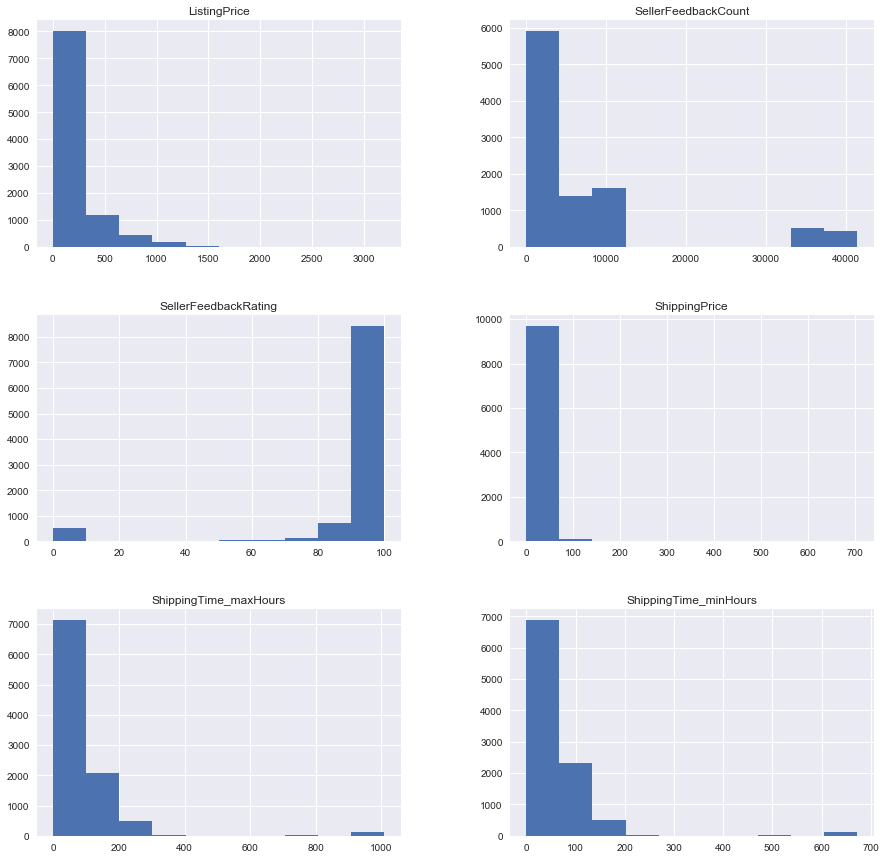

In [16]:
# Plot a histogram of the continuous features and save in a PDF file
df_new[continuous_columns].hist(figsize=(15,15))
plt.savefig('continuous_histograms.pdf')

# Box plots for all the continuous features(for updated CSV)

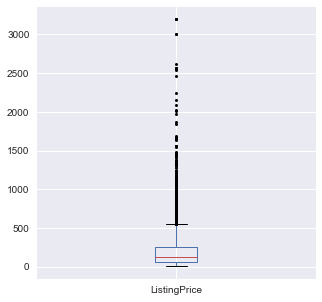

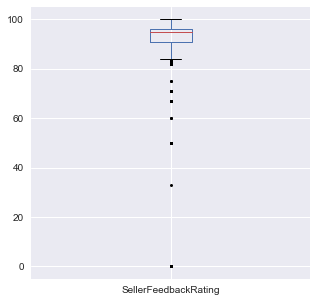

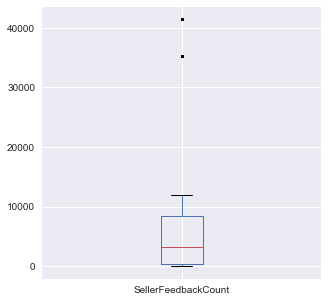

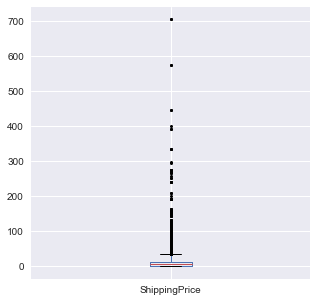

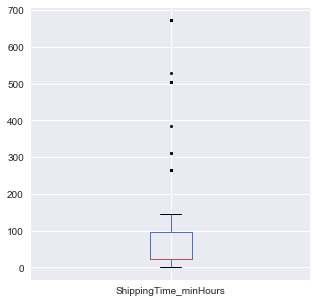

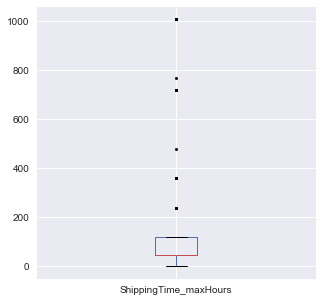

In [17]:
# Plot box plots for all the continuous features and save in a PDF file
pp = PdfPages('continuous_box_plots.pdf')

for col in continuous_columns:
   f = df_new[col].plot(kind='box', figsize=(5,5),sym='k.')
   pp.savefig(f.get_figure())
   plt.show()

pp.close()

# Bar plots for all the categorical features(for updated CSV)

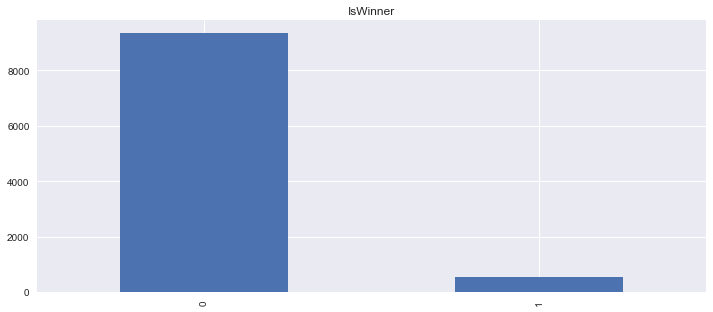

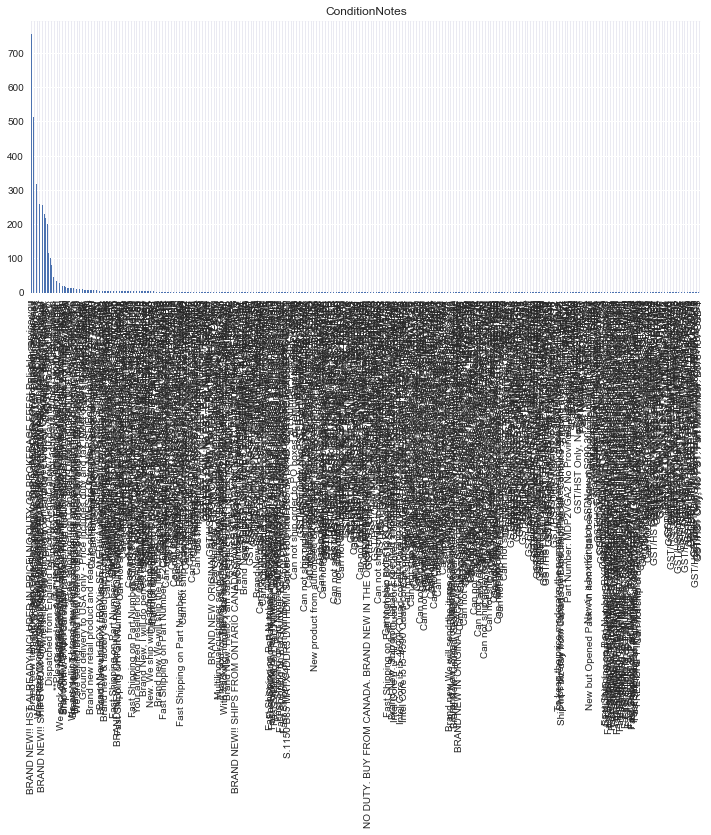

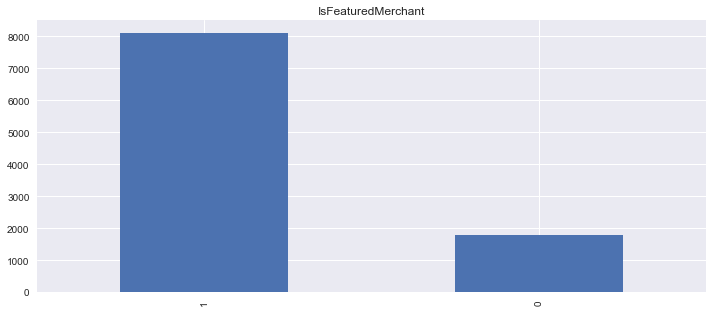

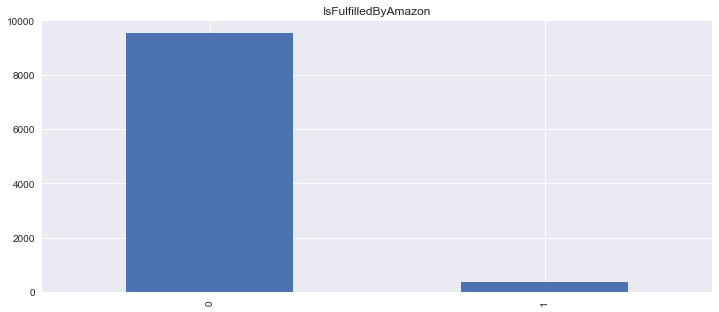

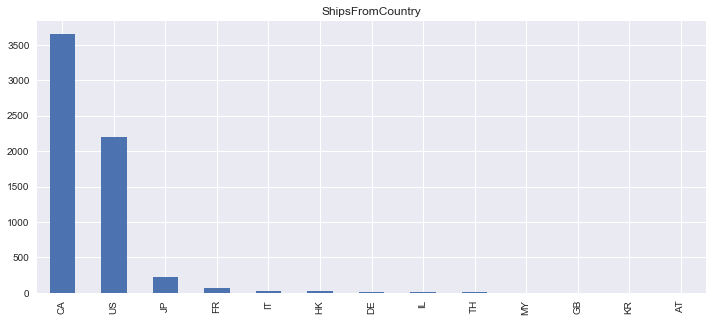

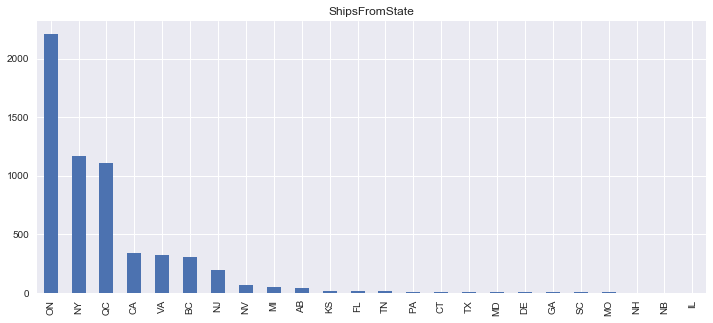

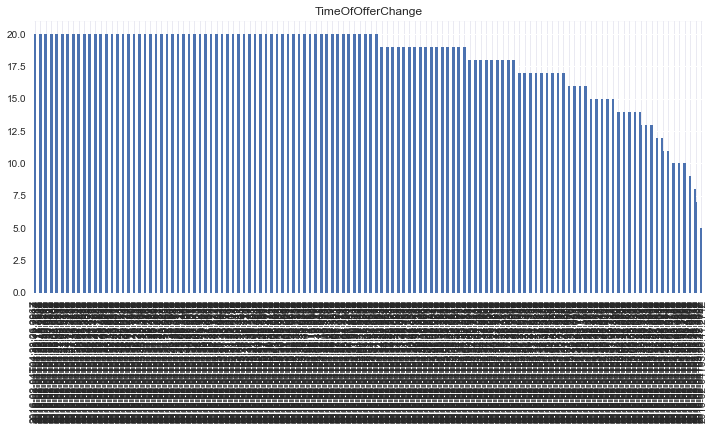

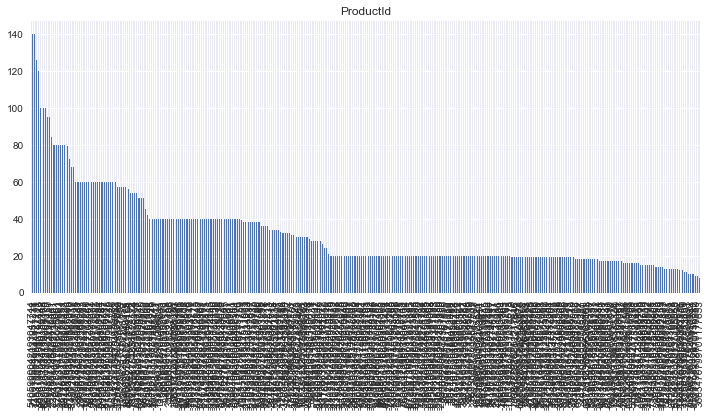

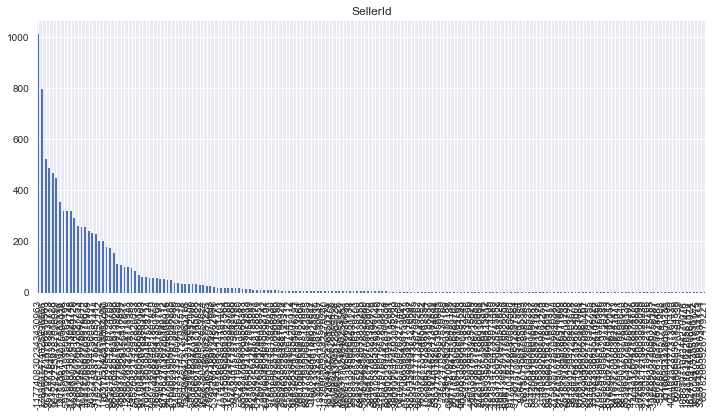

In [18]:
# Plot bar charts for all categorical features and save them in a single PDF file
pp = PdfPages('categorical_bar_charts.pdf')

for column in categorical_columns:
    f = df_new[column].value_counts().plot(kind='bar', title=column, figsize=(12,5))
    pp.savefig(f.get_figure())
    plt.show()

pp.close()

# 3. Data Understanding: data quality plan

## Irregular cardinality
Categorical features can have irregular cardinality if the same value is entered several times with a different spelling for example. In the following cell, we checked whether there are any values in the categorical features which are duplicated because 
of spelling mistakes or different input standards

In [19]:
# Check for irregular cardinality in categorical features. There could be same values spelled differently
print("Unique values for:\n- IsWinner:", pd.unique(df_new.IsWinner.ravel()))
print("\n- ProductId:", sorted(pd.unique(df_new.ProductId.ravel())))
print("\n- TimeOfOfferChange:", sorted(pd.unique(df_new.TimeOfOfferChange.ravel())))
print("\n- IsFeaturedMerchant:", sorted(pd.unique(df_new.IsFeaturedMerchant.ravel())))
print("\n- IsFulfilledByAmazon:", sorted(pd.unique(df_new.IsFulfilledByAmazon.ravel())))
print("\n- SellerId:", sorted(pd.unique(df_new.SellerId.ravel())))

print("\n- ConditionNotes:", pd.unique(df_new.ConditionNotes.ravel()))
print("\n- ShipsFromCountry:", pd.unique(df_new.ShipsFromCountry.ravel()))
print("\n- ShipsFromState:", pd.unique(df_new.ShipsFromState.ravel()))

Unique values for:
- IsWinner: [0 1]

- ProductId: [-9172603785822419760, -9131643267408786185, -9126883855039569378, -9094581775123605002, -9071353306264818770, -8948038242443301518, -8796291674889166687, -8779111094260159318, -8753757561659575803, -8738314130376825905, -8732817170887109628, -8704088376495022147, -8575358242830756582, -8506837154361110418, -8457269994049903817, -8296267449110208164, -8263941218997871484, -8198872304570680832, -8024977944699087706, -7853620206039503740, -7807449252725233908, -7706242550220907785, -7681223347323364211, -7634163259396771759, -7596484280964967740, -7405035237453204588, -7339523617685564893, -7270683157291618009, -7237428638354676575, -7184300916125296601, -7183258764051623574, -7015783879996412545, -7008003636341444582, -6987409544462956993, -6926349592210041187, -6883428587862493978, -6761955212143041834, -6737971099011372131, -6729873683232621685, -6696445740283325854, -6645029108607271865, -6519688935575603899, -6496226702250802184, -6

## Null values
In the following cell, we checked for null values in the dataset.

In [20]:
# Check whether there are null values in the data where values would be expected
df_new.isnull().sum()

IsWinner                    0
ProductId                   0
TimeOfOfferChange           0
ConditionNotes           4626
IsFeaturedMerchant          0
IsFulfilledByAmazon         0
ListingPrice                0
SellerFeedbackRating        0
SellerFeedbackCount         0
SellerId                    0
ShippingPrice               0
ShippingTime_minHours       0
ShippingTime_maxHours       0
ShipsFromCountry         3669
ShipsFromState           4035
dtype: int64

There are null values in the dataset, they correspond to features regarding products condition and Shipments. 

4626 products with specific sellers do not have a special notes and therefore the values for ConditionNotes are null for those products.

3669 products with specific sellers do not have values of ShipsFromCountry.

4035 products with specific sellers do not have values of ShipsFormState.

There are no instances of null values where a value would be expected.

# Outliers

In the box plots produced above, there are a number of outliers for the ListingPrice, SellerFeedbackRating, SellerFeedbackCount, ShippingPrice, ShippingTime_minHours and ShippingTime_maxHours. There could be error in the data or represent correct information. So in the following cells, we checked which product with specific seller has the highest price, which product with specific seller has the highest feedback rate, the highest shipping price, the least shipping time and the greatest or longest shipping time.

In [21]:
# In the box plot above, we can see that there are a number of outliers in the 'theListingPrice' feature. This could be
# an error or it could be due to the fact that the outlier is a product with specific seller which is more expensive than 
# other products or the same product with different sellers.

# Find out the 5 products of specific seller with the highest Listing price
df_new.sort_values(by='ListingPrice', axis=0, ascending=False, inplace=False, kind='quicksort', na_position='last').head(5)

,IsWinner,ProductId,TimeOfOfferChange,ConditionNotes,IsFeaturedMerchant,IsFulfilledByAmazon,ListingPrice,SellerFeedbackRating,SellerFeedbackCount,SellerId,ShippingPrice,ShippingTime_minHours,ShippingTime_maxHours,ShipsFromCountry,ShipsFromState
9069,0,2471683711038624825,2016-02-04T05:26:20.217Z,NaN,1,0,3194.32,96,1327,8648764257939339698,0.00,24,48,NaN,NaN
6890,0,2471683711038624825,2016-02-04T04:55:25.453Z,NaN,1,0,3194.32,96,1327,8648764257939339698,0.00,24,48,NaN,NaN
4947,0,2471683711038624825,2016-02-04T04:34:45.419Z,NaN,1,0,3194.32,96,1326,8648764257939339698,0.00,24,48,NaN,NaN
152,0,-5924928993300787167,2016-02-04T04:30:08.154Z,"GST/HST Only, No PST. Part Mummber: 184755",1,0,2999.00,95,4384,-2572277640783537773,12.12,24,48,CA,ON
4830,0,1711327863243739776,2016-02-04T04:34:33.189Z,"GST/HST Only, No PST. Part Number: ET91000SFP2",1,0,2999.00,95,4385,-2572277640783537773,12.52,24,48,CA,ON


In this table, we can see that among the products of specific sellers which are the most expensive, first three products are the same and from the same seller, which means the seller changed the listing price twice, The other two products from the same seller have the same price, which may suggest that these two products are form the same series of one brand, therefore the outliers for this features seem to have correct values.

In [22]:
# Find out the 5 products of specific seller with the lowest SellerFeedbackRating
df_new.sort_values(by='SellerFeedbackRating', axis=0, ascending=False, inplace=False, kind='quicksort', na_position='last').tail(5)

,IsWinner,ProductId,TimeOfOfferChange,ConditionNotes,IsFeaturedMerchant,IsFulfilledByAmazon,ListingPrice,SellerFeedbackRating,SellerFeedbackCount,SellerId,ShippingPrice,ShippingTime_minHours,ShippingTime_maxHours,ShipsFromCountry,ShipsFromState
2455,0,-5545190337175589068,2016-02-04T04:32:19.017Z,NaN,0,0,30.84,0,0,2559265098488794929,5.54,24,48,IL,NaN
804,1,5512865708617208561,2016-02-04T04:31:25.216Z,NaN,1,1,59.99,0,0,1207135739277432339,0.00,0,0,NaN,NaN
5810,1,-3396673264226342861,2016-02-04T04:42:56.651Z,NaN,1,1,78.00,0,0,1207135739277432339,0.00,0,0,NaN,NaN
2448,0,-5545190337175589068,2016-02-04T04:32:19.017Z,NaN,1,1,26.98,0,0,1207135739277432339,0.00,672,1008,NaN,NaN
0,0,-4885255916155087854,2016-02-04T04:26:52.136Z,NaN,1,1,94.00,0,0,1207135739277432339,0.00,672,1008,NaN,NaN


In this table, we can see that among the products of a specific sellers which are the highest seller feedback rating. All the products have 0% of seller feedback. Thus outliers for this features seem to have correct values.

In [23]:
# Find out the 5 products of specific seller with the highest SellerFeedbackCount
df_new.sort_values(by='SellerFeedbackCount', axis=0, ascending=False, inplace=False, kind='quicksort', na_position='last').head(5)

,IsWinner,ProductId,TimeOfOfferChange,ConditionNotes,IsFeaturedMerchant,IsFulfilledByAmazon,ListingPrice,SellerFeedbackRating,SellerFeedbackCount,SellerId,ShippingPrice,ShippingTime_minHours,ShippingTime_maxHours,ShipsFromCountry,ShipsFromState
2466,0,-5545190337175589068,2016-02-04T04:32:19.017Z,NaN,1,0,39.91,96,41420,9012427554787096099,12.0,24,48,NaN,NaN
8981,0,3864781223791788768,2016-02-04T05:26:15.632Z,NaN,1,0,43.71,96,41420,9012427554787096099,6.0,24,48,NaN,NaN
9834,0,-353902426769369969,2016-02-04T05:41:07.145Z,NaN,1,0,137.21,96,41420,9012427554787096099,8.0,96,120,NaN,NaN
6147,0,-1203282458825787586,2016-02-04T04:55:59.174Z,"Ships from Canada. Not additional duties, no c...",1,0,92.42,96,41420,9012427554787096099,7.0,24,48,NaN,NaN
1984,0,-6519688935575603899,2016-02-04T04:31:54.801Z,"Ships from Canada. Not additional duties, no c...",1,0,183.16,96,41420,9012427554787096099,19.3,96,120,NaN,NaN


In this table, we can see that amonG the products of specific sellers which are the highest Seller Feedback Count. All the products have 41420 feedback, outliers for this features seem to have correct values.

In [24]:
# Find out the 5 products of specific seller with the highest Shipping Price
df_new.sort_values(by='ShippingPrice', axis=0, ascending=False, inplace=False, kind='quicksort', na_position='last').head(5)

,IsWinner,ProductId,TimeOfOfferChange,ConditionNotes,IsFeaturedMerchant,IsFulfilledByAmazon,ListingPrice,SellerFeedbackRating,SellerFeedbackCount,SellerId,ShippingPrice,ShippingTime_minHours,ShippingTime_maxHours,ShipsFromCountry,ShipsFromState
1343,0,229338471365409007,2016-02-04T04:31:42.793Z,NaN,1,0,679.80,88,8452,-6639690782514669126,705.27,96,120,NaN,NaN
7392,0,229338471365409007,2016-02-04T04:56:20.610Z,NaN,1,0,679.80,88,8452,-6639690782514669126,705.27,96,120,NaN,NaN
5775,0,-281933683550746337,2016-02-04T04:38:39.530Z,NaN,1,0,503.49,88,8452,-6639690782514669126,575.09,96,120,NaN,NaN
610,0,-281933683550746337,2016-02-04T04:30:51.960Z,NaN,1,0,503.49,88,8452,-6639690782514669126,575.09,96,120,NaN,NaN
5067,0,5537362123079696830,2016-02-04T04:38:26.118Z,NaN,1,0,258.04,88,8452,-6639690782514669126,445.65,96,120,NaN,NaN


In this table, we can see that amonG the products of specific sellers which have the highest Shipping Price, the products have 705.27, 705.27, 575.09, 575.09, 445.65, outliers for this features seem to have correct values.

In [25]:
# Find out the 5 products of specific seller with the mininal ShippingTime
df_new.sort_values(by='ShippingTime_minHours', axis=0, ascending=False, inplace=False, kind='quicksort', na_position='last').head(5)

,IsWinner,ProductId,TimeOfOfferChange,ConditionNotes,IsFeaturedMerchant,IsFulfilledByAmazon,ListingPrice,SellerFeedbackRating,SellerFeedbackCount,SellerId,ShippingPrice,ShippingTime_minHours,ShippingTime_maxHours,ShipsFromCountry,ShipsFromState
0,0,-4885255916155087854,2016-02-04T04:26:52.136Z,NaN,1,1,94.00,0,0,1207135739277432339,0.0,672,1008,NaN,NaN
9524,0,7453706059544427211,2016-02-04T05:36:27.938Z,NaN,1,1,367.25,0,0,1207135739277432339,0.0,672,1008,NaN,NaN
396,0,7049326277407521616,2016-02-04T04:30:31.163Z,NaN,1,1,32.99,0,0,1207135739277432339,0.0,672,1008,NaN,NaN
7669,0,24775697167724061,2016-02-04T04:58:10.526Z,NaN,1,1,469.32,0,0,1207135739277432339,0.0,672,1008,NaN,NaN
6455,0,7106195985037851238,2016-02-04T04:55:50.631Z,NaN,1,1,233.23,0,0,1207135739277432339,0.0,672,1008,NaN,NaN


In this table, we can see that among the products of specific sellers which have minimal Shipping hour, the products all have 672, outliers for this features seem to have correct values.

In [26]:
# Find out the 5 products of specific seller with the maxinal ShippingTime
df_new.sort_values(by='ShippingTime_maxHours', axis=0, ascending=False, inplace=False, kind='quicksort', na_position='last').head(5)

,IsWinner,ProductId,TimeOfOfferChange,ConditionNotes,IsFeaturedMerchant,IsFulfilledByAmazon,ListingPrice,SellerFeedbackRating,SellerFeedbackCount,SellerId,ShippingPrice,ShippingTime_minHours,ShippingTime_maxHours,ShipsFromCountry,ShipsFromState
0,0,-4885255916155087854,2016-02-04T04:26:52.136Z,NaN,1,1,94.00,0,0,1207135739277432339,0.0,672,1008,NaN,NaN
9524,0,7453706059544427211,2016-02-04T05:36:27.938Z,NaN,1,1,367.25,0,0,1207135739277432339,0.0,672,1008,NaN,NaN
396,0,7049326277407521616,2016-02-04T04:30:31.163Z,NaN,1,1,32.99,0,0,1207135739277432339,0.0,672,1008,NaN,NaN
7669,0,24775697167724061,2016-02-04T04:58:10.526Z,NaN,1,1,469.32,0,0,1207135739277432339,0.0,672,1008,NaN,NaN
6455,0,7106195985037851238,2016-02-04T04:55:50.631Z,NaN,1,1,233.23,0,0,1207135739277432339,0.0,672,1008,NaN,NaN


In this table, we can see that among the products of specific sellers which have maximal Shipping hour, the products all have 1008, outliers for this features seem to have correct values.

# Duplicate rows
In the following cell, I check for duplicate rows. It is important to eliminate duplicates so as not to skew the result of the analysis, so if one candidate appears in more than one row, it would be necessary to eliminate one of the rows.

In [27]:
# Checking for duplicated rows, in the above box, I have already checked the duplicate rows and delete them. 

df.shape[0]-df_new.shape[0]

114

The number of duplicate rows is 114

In [28]:
#checking for duplicated rows which have the same Product Id, Seller Id and time of offer change, considering that no seller would change the same product in the same time twice in the same time.
print(df_new.set_index('ProductId','SellerId','TimeOfOfferChange').index.get_duplicates())

[]


There is no duplicate information for the same product id, seller id and time of offer change.

# Explanations
#### Data Quality Plan

| Feature                 | Data Quality Issue   | Handling Strategy            |
|-------------------------|----------------------|------------------------------|
| ConditionNotes          | Missing Values (47%) | Remove column                |
| ShipsFromCountry        | Missing Values (37%) | Remove column       | 
| ShipsFromState          | Missing Values (41%) | Remove column       |
| theListingPrice         | Outliers             | Do nothing                   |
| SellerFeedbackRating    | Outliers             | Do nothing                   |
| SellerFeedbackCount     | Outliers             | Do nothing                   |
| ShippingPrice           | Outliers             | Do nothing                   |
| ShippingTime_minHours   | Outliers             | Do nothing                   |
| ShippingTime_maxHours   | Outliers             | Do nothing                   |


We removed rows containing null values in ShipsFromstate and ShipsFromState, because these details are unnecessary and sellers can deliver products. For this reason, we think columns of a ShipsFromCountry or ShipsFromState are useless. The task for this problem is to 'to explore and transform the data to try and understand which features are most indicative of a seller being ranked first by Amazon for a product'. Therefore data relating to products which do not have ShipsFromCountry and ShipsFromState  would skew the result of the analysis.

As for ConditionNotes, since it has 47% of missing values, it is not good to use imputation on this feature. Also, deleting these rows will violate the completion of data to a great extent. So I removed column.

There are outliers in the theListingPrice, SellerFeedbackRating, SellerFeedbackCount, ShippingPrice, ShippingTime_minHours and ShippingTime_maxHours. I have decided not to remove the outliers by clamping, because as shown above, the outliers for theListingPrice, SellerFeedbackRating, SellerFeedbackCount, ShippingPrice, ShippingTime_minHours and ShippingTime_maxHours seem to be valid. Removing this data would probably modify the dataset to not reflect reality. It is not possible to verify the validity of the outliers in the feature so we chose to be cautious and to accept them as being valid, and therefore to keep them in the dataset so as not to produce distorted data. 

In [29]:
#remove the ConditionNotes
df_new = df_new.drop('ConditionNotes',1).drop('ShipsFromCountry', 1).drop('ShipsFromState', 1)
df_new.head()

,IsWinner,ProductId,TimeOfOfferChange,IsFeaturedMerchant,IsFulfilledByAmazon,ListingPrice,SellerFeedbackRating,SellerFeedbackCount,SellerId,ShippingPrice,ShippingTime_minHours,ShippingTime_maxHours
0,0,-4885255916155087854,2016-02-04T04:26:52.136Z,1,1,94.00,0,0,1207135739277432339,0.00,672,1008
1,1,-4885255916155087854,2016-02-04T04:26:52.136Z,1,0,107.35,95,4078,-1789487307643024748,0.00,48,72
2,0,-4885255916155087854,2016-02-04T04:26:52.136Z,1,0,100.46,98,478,5452082314297826053,6.99,24,48
3,0,-4885255916155087854,2016-02-04T04:26:52.136Z,1,0,99.24,95,4384,-2572277640783537773,11.67,24,48
4,0,-4885255916155087854,2016-02-04T04:26:52.136Z,0,0,109.48,94,105,-8704029307873847986,8.99,24,48


In [30]:
# Check that there are no null values in the dataframe
print(df_new.isnull().sum())

# check how many rows have been removed
print("\nNumber of rows:", df_new.shape[0])

IsWinner                 0
ProductId                0
TimeOfOfferChange        0
IsFeaturedMerchant       0
IsFulfilledByAmazon      0
ListingPrice             0
SellerFeedbackRating     0
SellerFeedbackCount      0
SellerId                 0
ShippingPrice            0
ShippingTime_minHours    0
ShippingTime_maxHours    0
dtype: int64

Number of rows: 9886


ConditionNotes, ShipsFromCountry, ShipsFromState have been removed. If the feature IsFulfilledByAmazon only has a cardinality of 1, it can be removed as it is not useful.

In [31]:
# print unique values in OnTwitter column
print("\n- Unique values for IsFulfilledByAmazon:", pd.unique(df_new.IsFulfilledByAmazon.ravel()))

# Remove IsFulfilledByAmazon column if there are only one unique value in OnTwitter
if(len(pd.unique(df_new.IsFulfilledByAmazon.ravel())) == 1):
    df_new = df_new.drop('IsFulfilledByAmazon', 1)
    
    
# Save cleaned dataframe to new CSV file
#amazon-offers-10k-samples_CLEANED
#Amazon-quality-issues-clean
df_new.to_csv('amazon-offers-10k-samples_CLEANED.csv', index=False)

df_new.head(1)


- Unique values for IsFulfilledByAmazon: [1 0]


,IsWinner,ProductId,TimeOfOfferChange,IsFeaturedMerchant,IsFulfilledByAmazon,ListingPrice,SellerFeedbackRating,SellerFeedbackCount,SellerId,ShippingPrice,ShippingTime_minHours,ShippingTime_maxHours
0,0,-4885255916155087854,2016-02-04T04:26:52.136Z,1,1,94.0,0,0,1207135739277432339,0.0,672,1008


#### Summary of data quality plan:
   
| Feature                 | Data Quality Issue   | Handling Strategy            |
|-------------------------|----------------------|------------------------------|
| ConditionNotes          | Missing Values (47%) | Remove column                |
| ShipsFromCountry        | Missing Values (37%) | Remove column                | 
| ShipsFromState          | Missing Values (41%) | Remove column                |
| theListingPrice         | Outliers             | Do nothing                   |
| SellerFeedbackRating    | Outliers             | Do nothing                   |
| SellerFeedbackCount     | Outliers             | Do nothing                   |
| ShippingPrice           | Outliers             | Do nothing                   |
| ShippingTime_minHours   | Outliers             | Do nothing                   |
| ShippingTime_maxHours   | Outliers             | Do nothing                   |
| IsFulfilledByAmazon     | Outliers             | Do nothing                   |
| IsFeaturedMerchant      | Outliers             | Do nothing                   |


# 4. Data Understanding: Relationships between features 

The features that we will use to look at pairwise feature interaction are 6 continuous features namely: 
- SellerFeedbackRating
- ListingPrice
- SellerFeedbackCount
- ShippingPrice
- ShippingTime_minHours
- ShippingTime_maxHours

and 3 categorical features namely:
- IsWinner
- IsFeaturedMerchant
- IsFulfilledByAmazon


## Correlations for the numeric features

In this section, we created a correlation matrix for the 7 continuous features.
The reason we chose correlation matrix for continuous features is that becuase we want to see the relationship between each pair of continuous features.

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5]),
 <a list of 6 Text xticklabel objects>)

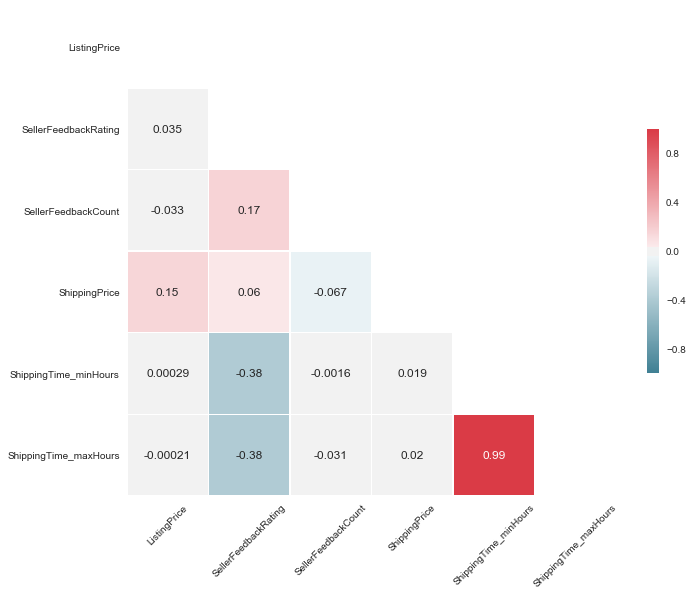

In [32]:
# Correlation matrix using code found on https://stanford.edu/~mwaskom/software/seaborn/examples/many_pairwise_correlations.html
clean_df = pd.read_csv('amazon-offers-10k-samples_CLEANED.csv')
sns.set(style="white")

# Select columns containing continuous data
continuous_columns = clean_df[['ListingPrice','SellerFeedbackRating','SellerFeedbackCount','ShippingPrice','ShippingTime_minHours','ShippingTime_maxHours']].columns

# Calculate correlation of all pairs of continuous features
corr = clean_df[continuous_columns].corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom colormap - blue and red
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, annot=True, mask=mask, cmap=cmap, vmax=1, vmin=-1,
            square=True, xticklabels=True, yticklabels=True,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)
plt.yticks(rotation = 0)
plt.xticks(rotation = 45)

## Continuous-continuous feature plots

In the following cells, there are plots for pairs of continuous features which have been shown to have a high correlation on the matrix above.

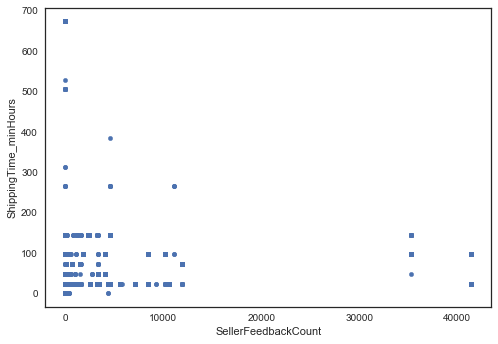

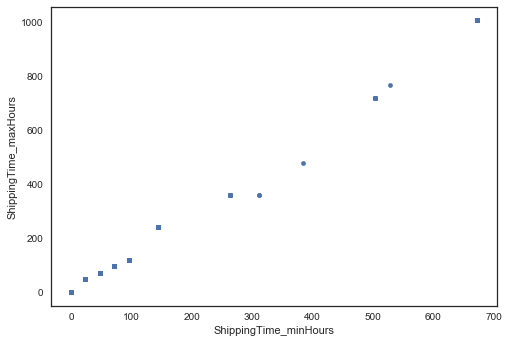

In [33]:
clean_df.plot(kind='scatter', x='SellerFeedbackCount', y='ShippingTime_minHours')
clean_df.plot(kind='scatter', x='ShippingTime_minHours', y='ShippingTime_maxHours')

## Categorical-categorical feature plots

In this section, we created stacked bar charts for pairs of categorical features. We also creates an extra column 'percent' in the dataframe in order to calculate the percentage of rows having particular values for a pair of features.

### IsWinner by IsFeaturedMerchant

(0, 100)

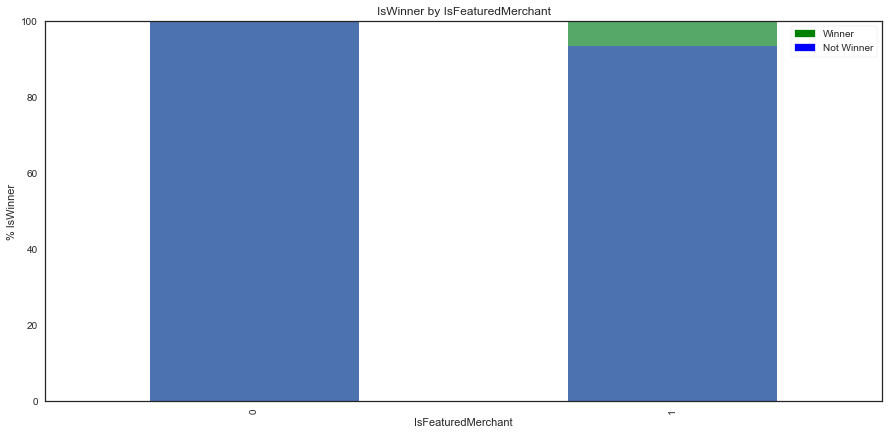

In [34]:
# Find unique values in IsFeaturedMerchant
IsFeaturedMerchant = pd.unique(clean_df.IsFeaturedMerchant.ravel())

# Insert a new column called 'percent' and fill it with 0s
clean_df['percent'] = 0

# Iterate through the unique values in IsFeaturedMerchant and for each value count the winner products
# Find the indexes of each row with a particular IsFeaturedMerchant amd for each of these row insert count * 100 in the percent column
for p in IsFeaturedMerchant:
    count = 1 / clean_df[clean_df.IsFeaturedMerchant == p].count()['IsWinner']
    index_list = clean_df[clean_df['IsFeaturedMerchant'] == p].index.tolist()
    for i in index_list:
        clean_df.loc[i, 'percent'] = count * 100
        
# Group dataframe by IsFeaturedMerchant and IsWinner and sum percent
group = clean_df[['percent','IsFeaturedMerchant','IsWinner']].groupby(['IsFeaturedMerchant','IsWinner']).sum()

# Plot values of group in a stacked bar chart
my_plot = group.unstack().plot(kind='bar', stacked=True, title="IsWinner by IsFeaturedMerchant", figsize=(15,7))

# Define label colours and text and add to the plot
red_patch = mpatches.Patch(color='green', label='Winner')
blue_patch = mpatches.Patch(color='blue', label='Not Winner')
my_plot.legend(handles=[red_patch, blue_patch], frameon = True)

# Define x and y labels and min and max values for the y axis
my_plot.set_xlabel("IsFeaturedMerchant")
my_plot.set_ylabel("% IsWinner")
my_plot.set_ylim([0,100])


###  IsWinner by IsFeaturedMerchant

(0, 100)

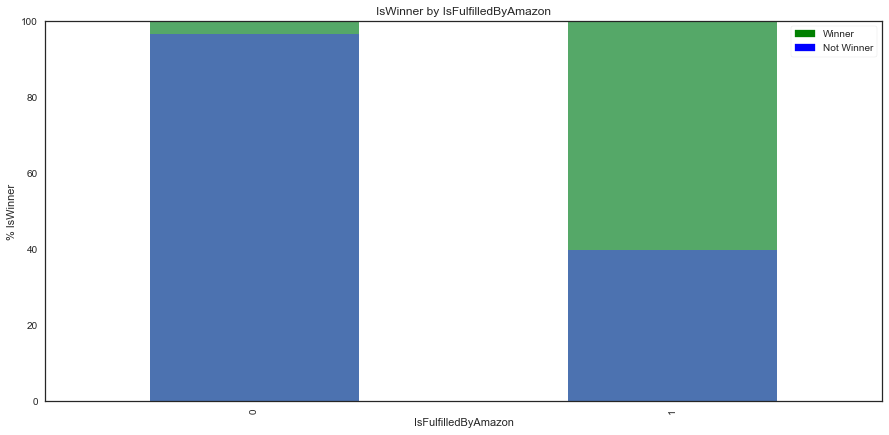

In [35]:
# Find unique values in IsFeaturedMerchant
IsFulfilledByAmazon = pd.unique(clean_df.IsFulfilledByAmazon.ravel())

# Insert a new column called 'percent' and fill it with 0s
clean_df['percent'] = 0

# Iterate through the unique values in IsFeaturedMerchant and for each value count the winner products
# Find the indexes of each row with a particular IsFeaturedMerchant amd for each of these row insert count * 100 in the percent column
for p in IsFulfilledByAmazon:
    count = 1 / clean_df[clean_df.IsFulfilledByAmazon == p].count()['IsWinner']
    index_list = clean_df[clean_df['IsFulfilledByAmazon'] == p].index.tolist()
    for i in index_list:
        clean_df.loc[i, 'percent'] = count * 100
        
# Group dataframe by IsFeaturedMerchant and IsWinner and sum percent
group = clean_df[['percent','IsFulfilledByAmazon','IsWinner']].groupby(['IsFulfilledByAmazon','IsWinner']).sum()

# Plot values of group in a stacked bar chart
my_plot = group.unstack().plot(kind='bar', stacked=True, title="IsWinner by IsFulfilledByAmazon", figsize=(15,7))

# Define label colours and text and add to the plot
red_patch = mpatches.Patch(color='green', label='Winner')
blue_patch = mpatches.Patch(color='blue', label='Not Winner')
my_plot.legend(handles=[red_patch, blue_patch], frameon = True)

# Define x and y labels and min and max values for the y axis
my_plot.set_xlabel("IsFulfilledByAmazon")
my_plot.set_ylabel("% IsWinner")
my_plot.set_ylim([0,100])

# Continuous-categorical feature plots
In this section, we plotted all continuous features with the categorical feature 'IsWinner' in box plots.
We chose continous-categorical because we want to see the relationships between all the continuous features and IsWinner.

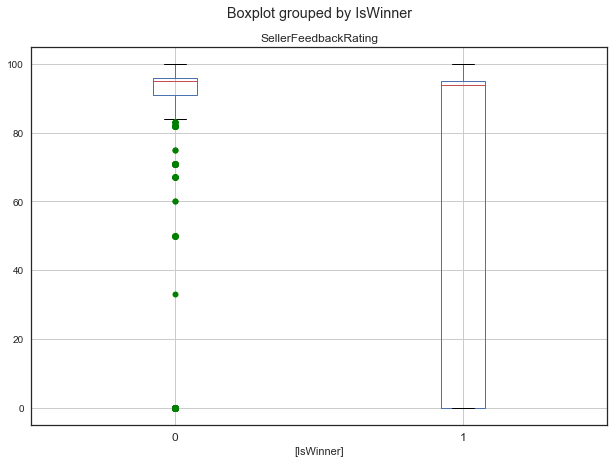

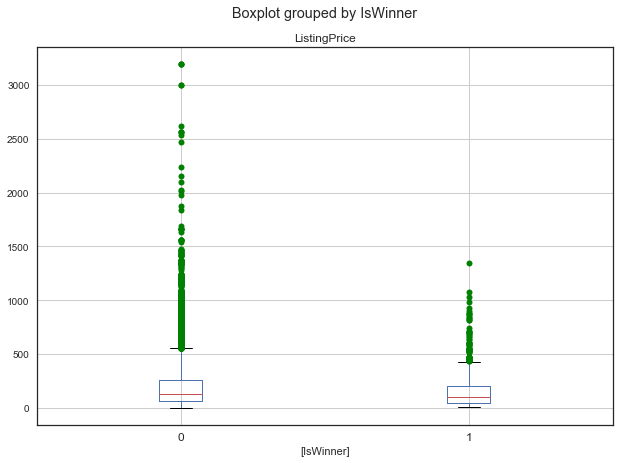

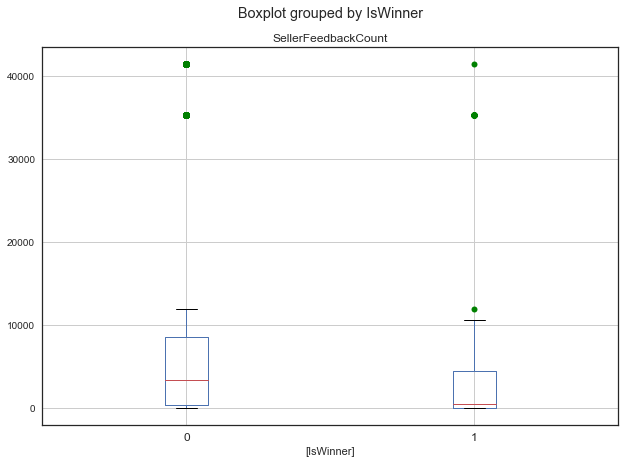

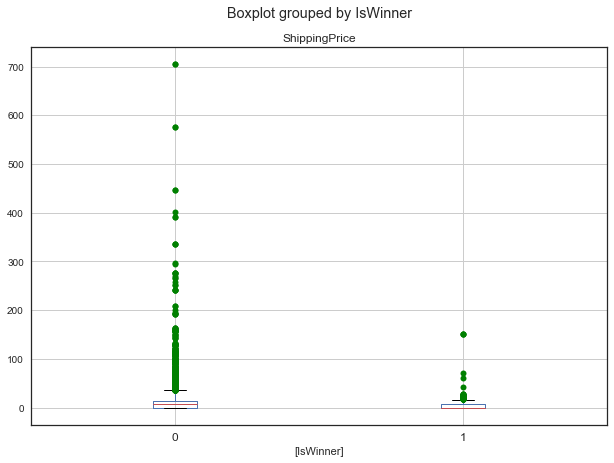

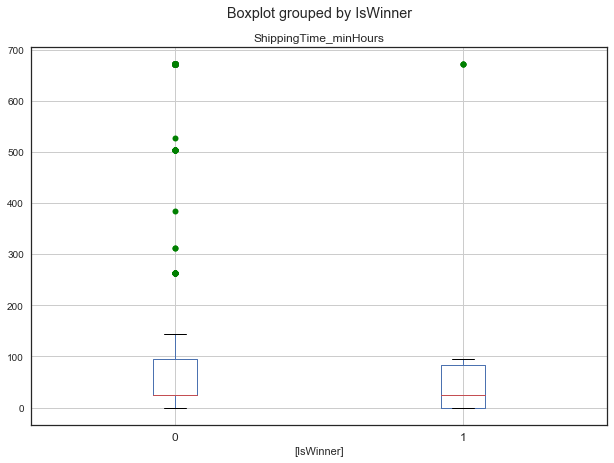

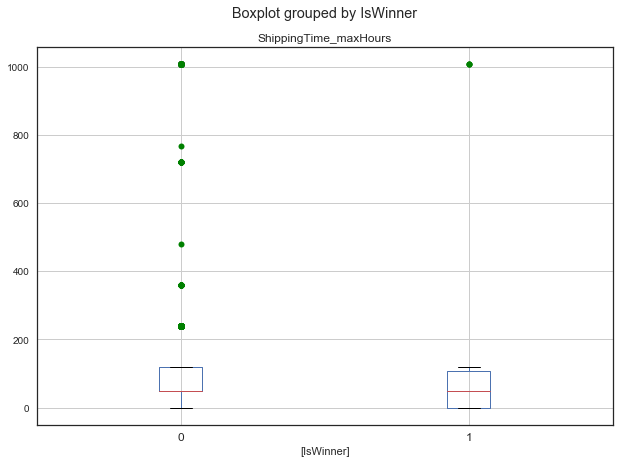

In [36]:
plt.figure()
flierprops = dict(marker='o', markerfacecolor='green', markersize=6,
                  linestyle='none')
bp = clean_df.boxplot(column=['SellerFeedbackRating'], by=['IsWinner'], flierprops=flierprops, figsize=(10,7))
bp = clean_df.boxplot(column=['ListingPrice'], by=['IsWinner'], flierprops=flierprops, figsize=(10,7))
bp = clean_df.boxplot(column=['SellerFeedbackCount'], by=['IsWinner'], flierprops=flierprops, figsize=(10,7))
bp = clean_df.boxplot(column=['ShippingPrice'], by=['IsWinner'], flierprops=flierprops, figsize=(10,7))
bp = clean_df.boxplot(column=['ShippingTime_minHours'], by=['IsWinner'], flierprops=flierprops, figsize=(10,7))
bp = clean_df.boxplot(column=['ShippingTime_maxHours'], by=['IsWinner'], flierprops=flierprops, figsize=(10,7))

## Explanations

By looking at the plots above, we can see that there are a number of features that are indicative of a seller being ranked first by Amazon for a product. By analysing this sample of sellers, it appears that featured merchant are more likely to be ranked first by Amazon for a product: 5% of featured merchant in the sample were ranked first agains 0% of normal merchant.

Sellers fulfilled by Amazon are more likely to be ranked first: 5% of sellers not fulfilled by Amazon are ranked first, while 60% of sellers fulfilled by Amazon are ranked first.

Products from certain states appear to be more likely to be ranked first than from others, this could be because there are more costomers who can afford online shopping in these regions. The Stacked bar chart for IsWinner by ShipsFromState shows the highest percentage of sellers ranked first are from BC(32%), PA(20%) and ON(5%).

Looking at seller and product details, we can find indications of sellers being ranked first.

Sellers with a high feedback rating appear more likely to be ranked first. The stacked bar chart for IsWinner by SellerFeedbackRating shows that most sellers ranked first have the feedbackrating from 90% to 100%.

Listing price seems to be not associated with sellers ranked first. The stacked bar chart for IsWinner by ListingPrice shows both sellers ranked first and not ranked first have the same average Listing price.

Sellers with a higher feedback count seem more likely to be ranked first by Amazon. The stacked bar chart for IsWinner by SellerFeedbackCount shows that on average, sellers ranked first have about 4900 feedbacks while sellers not ranked first have 2400 feedbacks.

Sellers with a lower shipping price seem more likely to be ranked first by Amazon. The stacked bar chart for IsWinner by ShippingPrice shows that sellers ranked first have a shipping price of 6 on average, while sellers not ranked first have a shipping price of 10 on average.

ShippingTime_minHours seems to be associated with sellers ranked first. The stacked bar chart for IsWinner by ShippingTime_minHours shows that on average, sellers ranked first have about 40 hours of mininal shipping time while sellers not ranked first have about 50 hours.

ShippingTime_maxHours seems to be associated with sellers ranked first. The stacked bar chart for IsWinner by ShippingTime_maxHours shows that on average, sellers ranked first have about 70 hours of maximal shipping time while sellers not ranked first have about 80 hours.

The sample that was analysed above shows initial evidence that shipping price, shipping hours and feedbacks are indicative of getting ranked first. Sellers with low shipping price, more feedbacks and shorter shipping hours seem to be more likely to be ranked first. 


#  Data Understanding: Exploring relationships between feature pairs

In [37]:
# use cleaned dataset from homework1
df = pd.read_csv('amazon-offers-10k-samples_CLEANED.csv')

In [38]:
# Print the feature types in our dataset.
df.dtypes

IsWinner                   int64
ProductId                  int64
TimeOfOfferChange         object
IsFeaturedMerchant         int64
IsFulfilledByAmazon        int64
ListingPrice             float64
SellerFeedbackRating       int64
SellerFeedbackCount        int64
SellerId                   int64
ShippingPrice            float64
ShippingTime_minHours      int64
ShippingTime_maxHours      int64
dtype: object

In [39]:
# Select columns containing categorical data
categorical_columns = df[['IsWinner','IsFeaturedMerchant','IsFulfilledByAmazon','TimeOfOfferChange']].columns
# Select columns containing ID type of data
ID_columns = df[['ProductId', 'SellerId']].columns

In [40]:
# Convert data type to category for these columns
for column in categorical_columns:
    df[column] = df[column].astype('category')
    
for column in ID_columns:
    df[column] = df[column].astype('object')

In [41]:
df.head(5)

,IsWinner,ProductId,TimeOfOfferChange,IsFeaturedMerchant,IsFulfilledByAmazon,ListingPrice,SellerFeedbackRating,SellerFeedbackCount,SellerId,ShippingPrice,ShippingTime_minHours,ShippingTime_maxHours
0,0,-4885255916155087854,2016-02-04T04:26:52.136Z,1,1,94.00,0,0,1207135739277432339,0.00,672,1008
1,1,-4885255916155087854,2016-02-04T04:26:52.136Z,1,0,107.35,95,4078,-1789487307643024748,0.00,48,72
2,0,-4885255916155087854,2016-02-04T04:26:52.136Z,1,0,100.46,98,478,5452082314297826053,6.99,24,48
3,0,-4885255916155087854,2016-02-04T04:26:52.136Z,1,0,99.24,95,4384,-2572277640783537773,11.67,24,48
4,0,-4885255916155087854,2016-02-04T04:26:52.136Z,0,0,109.48,94,105,-8704029307873847986,8.99,24,48


As a group, we have thought of creating the following new variables to see if we can improve our previous results:

1) Rating_score: this is the product of feedback rating and feedback count. We are creating it because we thought that using only 1 feature rather than 2 could lead to simpler models with high prediction rates.

2) Total_cost: this is the sum of listing price and shipping price. We are creating it for the same reason as for Rating_score. The rationale is that Amazon might look at the total cost of an item rather than shippign and listing price separately to decide whether a seller is a winner or not

3) ShippingToListing : this is the proportion of shipping cost to listing price. It could be an interesting feature to see in the data, especially because consumers normally despise products that have high shipping price compared to their actual price. In such a case they would rather go to a physical shop

In [42]:
# creating z scores of continuous variables grouped by productid and timeofofferchange

#added feature rating_score to combine seller feedback rating and seller feedback count
df.insert(0,'Rating_score', df.SellerFeedbackRating * df.SellerFeedbackCount)

#added feature total_cost
df.insert(0,'Total_cost', df.ListingPrice + df.ShippingPrice)

#added feature shippingtolisting
df.insert(0,'Shipping_to_Listing', df.ShippingPrice / df.ListingPrice)

#zscore formula
zscore = lambda x: (x - x.mean()) / x.std()

df.insert(0, 'ZofShippingPrice', df.groupby(['ProductId', 'TimeOfOfferChange'])['ShippingPrice'].transform(zscore))
df.insert(0, 'ZofListingPrice', df.groupby(['ProductId', 'TimeOfOfferChange'])['ListingPrice'].transform(zscore))
df.insert(0, 'ZofSellerFeedbackCount', df.groupby(['ProductId', 'TimeOfOfferChange'])['SellerFeedbackCount'].transform(zscore))
df.insert(0, 'ZofSellerFeedbackRating', df.groupby(['ProductId', 'TimeOfOfferChange'])['SellerFeedbackRating'].transform(zscore))
df.insert(0, 'ZofShippingTime_maxHours', df.groupby(['ProductId', 'TimeOfOfferChange'])['ShippingTime_maxHours'].transform(zscore))
df.insert(0, 'ZofShippingTime_minHours', df.groupby(['ProductId', 'TimeOfOfferChange'])['ShippingTime_minHours'].transform(zscore))
df.insert(0, 'ZofRating_score', df.groupby(['ProductId', 'TimeOfOfferChange'])['Rating_score'].transform(zscore))
df.insert(0, 'ZofTotal_cost', df.groupby(['ProductId', 'TimeOfOfferChange'])['Total_cost'].transform(zscore))
df.insert(0, 'ZofShipping_to_Listing', df.groupby(['ProductId', 'TimeOfOfferChange'])['Shipping_to_Listing'].transform(zscore))



# reason for normalization: so that the continuous variables are easily comparable and to make models converge more easily in case the numbers are huge or very small
# reason for using z-score: it is a popular normalization method, easy to apply, introduced in classroom and works well for most kinds of data (possible exception: shippingprice, but I did not want to have continuous variables normalised with different methods)

In [43]:
df.head(5)

,ZofShipping_to_Listing,ZofTotal_cost,ZofRating_score,ZofShippingTime_minHours,ZofShippingTime_maxHours,ZofSellerFeedbackRating,ZofSellerFeedbackCount,ZofListingPrice,ZofShippingPrice,Shipping_to_Listing,...,TimeOfOfferChange,IsFeaturedMerchant,IsFulfilledByAmazon,ListingPrice,SellerFeedbackRating,SellerFeedbackCount,SellerId,ShippingPrice,ShippingTime_minHours,ShippingTime_maxHours
0,-1.029791,-2.192037,-0.497345,4.039586,4.088738,-3.918813,-0.498854,-1.790526,-1.042943,0.000000,...,2016-02-04T04:26:52.136Z,1,1,94.00,0,0,1207135739277432339,0.00,672,1008
1,-1.029791,-1.381633,-0.156139,-0.215330,-0.221013,0.222556,-0.154400,-1.013748,-1.042943,0.000000,...,2016-02-04T04:26:52.136Z,1,0,107.35,95,4078,-1789487307643024748,0.00,48,72
2,0.566736,-1.375563,-0.456088,-0.378980,-0.331519,0.353336,-0.458479,-1.414647,0.322931,0.069580,...,2016-02-04T04:26:52.136Z,1,0,100.46,98,478,5452082314297826053,6.99,24,48
3,1.668422,-1.165525,-0.130536,-0.378980,-0.331519,0.222556,-0.128553,-1.485633,1.237421,0.117594,...,2016-02-04T04:26:52.136Z,1,0,99.24,95,4384,-2572277640783537773,11.67,24,48
4,0.854366,-0.706600,-0.488652,-0.378980,-0.331519,0.178962,-0.489985,-0.889812,0.713739,0.082115,...,2016-02-04T04:26:52.136Z,0,0,109.48,94,105,-8704029307873847986,8.99,24,48


In [44]:
continuous_columns = df[['ZofListingPrice','ZofSellerFeedbackCount','ZofSellerFeedbackRating','ZofShippingPrice','ZofShippingTime_maxHours', 'ZofShippingTime_minHours','ZofRating_score','ZofTotal_cost','ZofShipping_to_Listing']].columns


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5]),
 <a list of 9 Text xticklabel objects>)

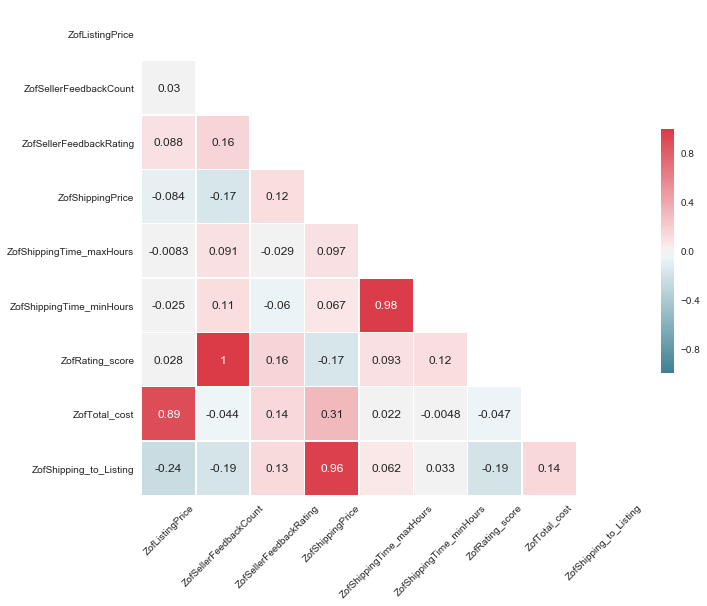

In [45]:
sns.set(style="white")
# Calculate correlation of all pairs of continuous features
corr = df[continuous_columns].corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom colormap - blue and red
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, annot=True, mask=mask, cmap=cmap, vmax=1, vmin=-1,
            square=True, xticklabels=True, yticklabels=True,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)
plt.yticks(rotation = 0)
plt.xticks(rotation = 45)

## Plot the scatter plots of each pair of continuous descriptive feature and target feature.

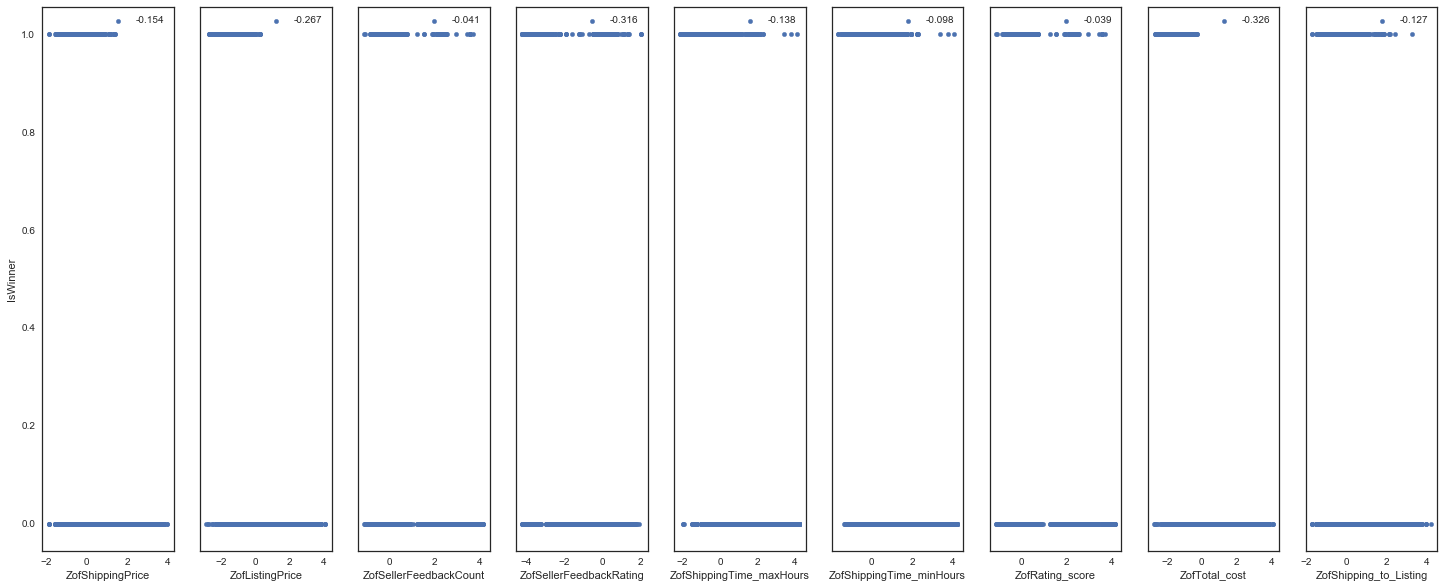

In [46]:
is_winner = df[['IsWinner']]
for column in is_winner:
    df[column] = df[column].astype(float)

# Scatterplots for each descriptive feature and target feature. 
# Show the correlation value in the plot.
fig, axs = plt.subplots(1, 9, sharey=True)
df.plot(kind='scatter', x='ZofShippingPrice', y='IsWinner', label="%.3f" % df[['ZofShippingPrice', 'IsWinner']].corr().as_matrix()[0,1], ax=axs[0], figsize=(25, 10))
df.plot(kind='scatter', x='ZofListingPrice', y='IsWinner', label="%.3f" % df[['ZofListingPrice', 'IsWinner']].corr().as_matrix()[0,1], ax=axs[1])
df.plot(kind='scatter', x='ZofSellerFeedbackCount', y='IsWinner', label="%.3f" % df[['ZofSellerFeedbackCount', 'IsWinner']].corr().as_matrix()[0,1], ax=axs[2])
df.plot(kind='scatter', x='ZofSellerFeedbackRating', y='IsWinner', label="%.3f" % df[['ZofSellerFeedbackRating', 'IsWinner']].corr().as_matrix()[0,1], ax=axs[3])
df.plot(kind='scatter', x='ZofShippingTime_maxHours', y='IsWinner', label="%.3f" % df[['ZofShippingTime_maxHours', 'IsWinner']].corr().as_matrix()[0,1], ax=axs[4])
df.plot(kind='scatter', x='ZofShippingTime_minHours', y='IsWinner', label="%.3f" % df[['ZofShippingTime_minHours', 'IsWinner']].corr().as_matrix()[0,1], ax=axs[5])
df.plot(kind='scatter', x='ZofRating_score', y='IsWinner', label="%.3f" % df[['ZofRating_score', 'IsWinner']].corr().as_matrix()[0,1], ax=axs[6])
df.plot(kind='scatter', x='ZofTotal_cost', y='IsWinner', label="%.3f" % df[['ZofTotal_cost', 'IsWinner']].corr().as_matrix()[0,1], ax=axs[7])
df.plot(kind='scatter', x='ZofShipping_to_Listing', y='IsWinner', label="%.3f" % df[['ZofShipping_to_Listing', 'IsWinner']].corr().as_matrix()[0,1], ax=axs[8])


In [47]:
for column in is_winner:
    df[column] = df[column].astype('category')
    
#convert IsWinner again to category for plots later

## Observations from the scatter plots and correlations.

Here are the list of observations we have had:

Some variables have a problem of multicollinearity.

We expected Listing Price and Total cost to be highly correlated since the latter is a combination of the former
Same can be said of Rating_score and Feedback count.
Same can be said of shipping price and shipping to listing price.
It comes as a moderate surprise the fact that min shipping hours are highly correlated with maximum shipping hours. 

These variables that are very highly correlated cannot be used together in a predictive model because of multicollinearity issues.


For the scatterplots, we decided to interpret a variable as interesting when it is > 0.1 or < -0.1 correlation and does not have problems of multicollinearity with more interesting variables.

From the scatterplots we see several interesting things:
1) the lower the shipping price, the higher the chance of being a winner. This variable seems very promising
2) the lower the listing price, the higher the chance of being a winner. This variable seems very promising.
3) ZOfSellerFeedbackCount has a correlation with IsWinner that is very close to 0, so it does not seem like a very promising variable and will be dropped from dataframe.
4) the lower the feedback rating , the higher the chance that seller is a winner ( with some outliers). This variable seems rather promising
5) Shipping times were found to be very highly correlated. In the two plots above we see that the lower the max and min shipping time the higher the chance of being a winner. These variable seem very promising but they cannot be used both at the same time. Since max_shipping times has a higher correlation than minimum shipping times, we will use max_shipping times in this assignment.
6) Rating_score has a correlation very close to 0 so it does not seem very promising.
7) Total cost seems very, very promising with a higher correlation value. Since it has a higher correlation than both listing and shipping price, total cost will be used rather than the other 2 variables.
8) Shipping to listing is an interesting variable but since total cost has a much higher correlation, it will not be used in the analysis

Therefore, ZofTotal_cost, ZofSellerFeebackRating, ZofShippingTimes_maxhours will be used to predict IsWinner as continuous features.


## For each categorical feature, plot the pairwise interaction with the target feature.

(0, 100)

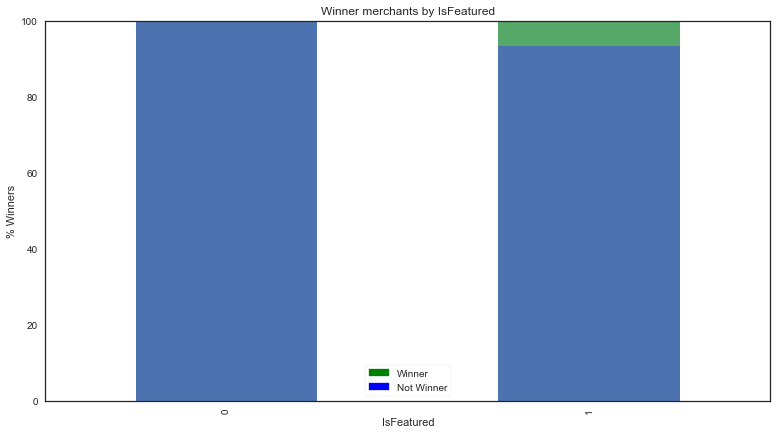

In [48]:
# Count the number of sellers that are featured on Amazon (1 should be Yes)
Yes_Featured_count = 1 / df[df.IsFeaturedMerchant == 1].count()['IsFeaturedMerchant']

# Count the number of sellers that are not featured on Amazon (0 should be No)
No_Featured_count = 1 / df[df.IsFeaturedMerchant == 0].count()['IsFeaturedMerchant']

# Create a new column in the dataframe called percent and insert sellers not featured on Amazon count in all cells
df['percent'] = No_Featured_count * 100

# Find indexes of all rows containing value 1 (Yes_Featured_count) for IsFeaturedMerchant
index_list = df[df['IsFeaturedMerchant'] == 1].index.tolist()

# For each row with a '1' value, insert Yes_Featured_count in the percent column
for i in index_list:
    df.loc[i, 'percent'] = Yes_Featured_count * 100

# Group dataframe by IsFeaturedMerchant and IsWinner and sum precent
category_group = df[['percent','IsFeaturedMerchant','IsWinner']].groupby(['IsFeaturedMerchant','IsWinner']).sum()

# Plot values of category_group in a stacked bar chart
my_plot = category_group.unstack().plot(kind='bar', stacked=True, title="Winner merchants by IsFeatured", figsize=(13,7))

# Define legend colours and text and add to the plot
red_patch = mpatches.Patch(color='green', label='Winner')
blue_patch = mpatches.Patch(color='blue', label='Not Winner')
my_plot.legend(handles=[red_patch, blue_patch], frameon = True)

# Define x and y labels and min and max values for the y axis
my_plot.set_xlabel("IsFeatured")
my_plot.set_ylabel("% Winners")
my_plot.set_ylim([0,100])

(0, 100)

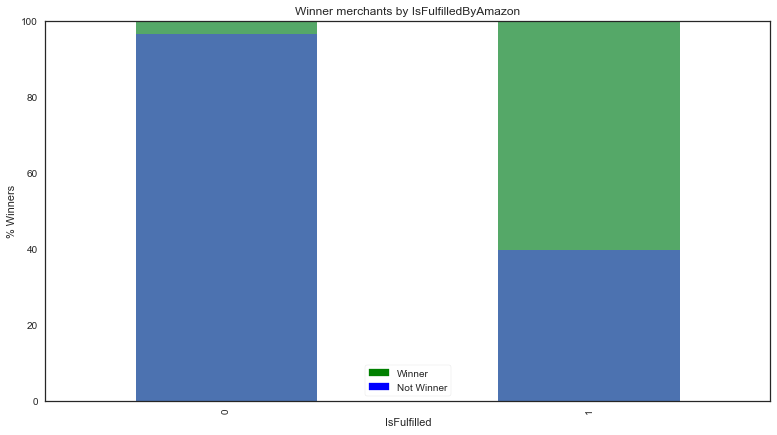

In [49]:
# Count the number of sellers that are featured on Amazon (1 should be Yes)
Yes_Fulfilled_by_Amazon_count = 1 / df[df.IsFulfilledByAmazon == 1].count()['IsFulfilledByAmazon']

# Count the number of sellers that are not featured on Amazon (0 should be No)
No_Fulfilled_by_Amazon_count = 1 / df[df.IsFulfilledByAmazon == 0].count()['IsFulfilledByAmazon']

# Create a new column in the dataframe called percent and insert sellers not featured on Amazon count in all cells
df['percent'] = No_Fulfilled_by_Amazon_count * 100

# Find indexes of all rows containing value 1 (Yes_Featured_count) for IsFeaturedMerchant
index_list = df[df['IsFulfilledByAmazon'] == 1].index.tolist()

# For each row with a '1' value, insert Yes_Featured_count in the percent column
for i in index_list:
    df.loc[i, 'percent'] = Yes_Fulfilled_by_Amazon_count * 100

# Group dataframe by IsFeaturedMerchant and IsWinner and sum precent
category_group = df[['percent','IsFulfilledByAmazon','IsWinner']].groupby(['IsFulfilledByAmazon','IsWinner']).sum()

# Plot values of category_group in a stacked bar chart
my_plot = category_group.unstack().plot(kind='bar', stacked=True, title="Winner merchants by IsFulfilledByAmazon", figsize=(13,7))

# Define legend colours and text and add to the plot
red_patch = mpatches.Patch(color='green', label='Winner')
blue_patch = mpatches.Patch(color='blue', label='Not Winner')
my_plot.legend(handles=[red_patch, blue_patch], frameon = True)

# Define x and y labels and min and max values for the y axis
my_plot.set_xlabel("IsFulfilled")
my_plot.set_ylabel("% Winners")
my_plot.set_ylim([0,100])

##  Understanding the graphs.

IsFeaturedMerchant seems a very promising feature because among the featured merchants, all of them were winners. Therefore, it seems that this feature has a high predictive power.
Likewise, isFulfilledByAmazon seems to have a high predictive power because a large majority of sellers who had their products shipped by Amazon were winners. 
Therefore, I believe both features should be included in the models we are going to use.

# 5. Predictive Modeling: Linear Regression  

In [50]:
# Convert data type to float for these columns

# Select columns containing categorical data
categorical_columns = df[['IsWinner','IsFeaturedMerchant','IsFulfilledByAmazon']].columns

for column in categorical_columns:
    df[column] = df[column].astype(float)

In [51]:

# The formula specifies the target feature and the descriptive features used for training the 
# linear regression model.
# We first train a simple linear regression with only one descriptive feature (Size).
# For training the model we call the method fit() on the given data stored in our df dataframe.
lm = sm.ols(formula="IsWinner ~  IsFeaturedMerchant + IsFulfilledByAmazon + ZofTotal_cost + ZofSellerFeedbackRating + ZofShippingTime_maxHours", data=df).fit()
# Print the model weights/parameters
print(lm.params)

Intercept                  -0.012855
IsFeaturedMerchant          0.061066
IsFulfilledByAmazon         0.490626
ZofTotal_cost              -0.050502
ZofSellerFeedbackRating    -0.003034
ZofShippingTime_maxHours   -0.040782
dtype: float64


In [52]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:               IsWinner   R-squared:                       0.300
Model:                            OLS   Adj. R-squared:                  0.300
Method:                 Least Squares   F-statistic:                     847.6
Date:                Sun, 07 May 2017   Prob (F-statistic):               0.00
Time:                        11:43:38   Log-Likelihood:                 2325.3
No. Observations:                9886   AIC:                            -4639.
Df Residuals:                    9880   BIC:                            -4595.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

In [53]:
#evaluation of the quality of the model

# creating a dataframe with only predicted and predictors

#create array of predicted values
lm_prediction1 = lm.predict(df[['IsFeaturedMerchant', 'IsFulfilledByAmazon', 'ZofTotal_cost', 'ZofShippingTime_maxHours', 'ZofSellerFeedbackRating']])


#cut off of 0.5 for predictions
array_predicted = []
for i in range(0,len(lm_prediction1)):
    if lm_prediction1[i] >= 0.5:
        array_predicted += [1]
    else:
        array_predicted += [0]
        
# Some more evaluation metrics.
print("Accuracy: ", metrics.accuracy_score(df.IsWinner, array_predicted))
print("Confusion matrix: \n", metrics.confusion_matrix(df.IsWinner, array_predicted))
print("Classification report:\n ", metrics.classification_report(df.IsWinner, array_predicted))

Accuracy:  0.964394092656
Confusion matrix: 
 [[9315   24]
 [ 328  219]]
Classification report:
               precision    recall  f1-score   support

        0.0       0.97      1.00      0.98      9339
        1.0       0.90      0.40      0.55       547

avg / total       0.96      0.96      0.96      9886



## Discussion on Linear Regression and evaluation of the model on the training set.

The key measures we have are accuracy,precision,recall and f1-score.

#### Accuracy

we have 96% accuracy meaning that our model predicts the correct result in 96% of cases.

confusion matrix
[true positives    false positives
 false negatives   true negatives]
 
 we have 9315 true positives, where the model predicted 0 and the actual class is 0
 we have 24 false positives, where the model predicted 0 and the actual class is 1
 we have 328 false negatives, where the model predicted 1 and the actual class is 0
 we have 219 true negatives, where the model predicted 1 and the actual class is 1
 
#### Precision

Precision: When the model predicts IsWinner, it is correct in 96% of the cases on average.

#### Recall

Recall: Given the target feature IsWinner, the model predicts correctly in 96% of the cases ( however, the recall of IsWinner = 1 is very low)

#### F1-score

F1 score conveys the balance between the precision and the recall. The F1 score is on average 0.96 (but again much lower for IsWinner = 1)

In conclusion, the model seems to be quite a good one, but there are some margin of improvements in the recall of IsWinner = 1


###  Interpreting the model

The coefficients and their p values were already printed, thus the discussion will refer to the previous section.

1 -  IsFeaturedMerchant has a coefficient of 0.06 and a p-value of 0.000, suggesting that a featured merchant leads to +0.06 higher likelihood of being a winner seller. The p-value is < 0.05 so it is statistically significant.

2 - IsFulfilledByAmazon has a coefficient of 0.49 and a p-value of 0.000, suggesting that a seller which lets Amazon ship its product has a 0.49 higher likelihood of being a winner seller. The p-value is < 0.05 so it is statistically significant.

3 - ZofTotal_cost has a coefficient of -0.0505 and a p-value of 0.000, suggesting that every 1 point added to the standard deviation of the price of the product decreases of 0.0505 the likelihood that the seller will be a winner. The p-value is < 0.05 so it is statistically significant.

4 - ZofSellerFeedbackRating has a coefficient of -0.003 and a p-value of 0.294, suggesting that every 1 point added to the standard deviation of the feedback rating of the product decreases of 0.003 the likelihood that the seller will be a winner. The p-value is > 0.05 so it is not statistically significant.

6 - ZofShippingTime_maxHours has a coefficient of -0.04 and a p-value of 0.000, suggesting that every 1 point added to the standard deviation of the maximum time required to ship the product decreases of 0.04 the likelihood that the seller will be a winner. The p-value is < 0.05 so it is statistically significant.

## Retraining the model using only the subset of features found to be statistically significant andd evaluating the quality of the model on the training set.

In [54]:

# The formula specifies the target feature and the descriptive features used for training the 
# linear regression model.
# We first train a simple linear regression with only one descriptive feature (Size).
# For training the model we call the method fit() on the given data stored in our df dataframe.
lm2 = sm.ols(formula="IsWinner ~  IsFeaturedMerchant + IsFulfilledByAmazon + ZofTotal_cost + ZofShippingTime_maxHours", data=df).fit()

# Print the model weights/parameters
print(lm2.params)

Intercept                  -0.012313
IsFeaturedMerchant          0.059875
IsFulfilledByAmazon         0.502296
ZofTotal_cost              -0.050250
ZofShippingTime_maxHours   -0.040858
dtype: float64


In [55]:
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:               IsWinner   R-squared:                       0.300
Model:                            OLS   Adj. R-squared:                  0.300
Method:                 Least Squares   F-statistic:                     1059.
Date:                Sun, 07 May 2017   Prob (F-statistic):               0.00
Time:                        11:43:38   Log-Likelihood:                 2324.7
No. Observations:                9886   AIC:                            -4639.
Df Residuals:                    9881   BIC:                            -4603.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

In [56]:
# evaluation of the quality of the model

# creating a dataframe with only predicted and predictors

#create array of predicted values
lm_prediction2 = lm2.predict(df[['IsFeaturedMerchant', 'IsFulfilledByAmazon', 'ZofTotal_cost', 'ZofShippingTime_maxHours']])

#cut off of 0.5 for predictions
array_predicted2 = []

for i in range(0,len(lm_prediction2)):
    if lm_prediction2[i] >= 0.5:
        array_predicted2 += [1]
    else:
        array_predicted2 += [0]
        
# Some more evaluation metrics.
print("Accuracy: ", metrics.accuracy_score(df.IsWinner, array_predicted2))
print("Confusion matrix: \n", metrics.confusion_matrix(df.IsWinner, array_predicted2))
print("Classification report:\n ", metrics.classification_report(df.IsWinner, array_predicted2))

Accuracy:  0.964394092656
Confusion matrix: 
 [[9315   24]
 [ 328  219]]
Classification report:
               precision    recall  f1-score   support

        0.0       0.97      1.00      0.98      9339
        1.0       0.90      0.40      0.55       547

avg / total       0.96      0.96      0.96      9886



By removing the feature ZofSellerFeedbackRating we did not get any better or worse model. The key evaluation metrics (accuracy,precision,recall and f1-score) remained exactly the same. This means that this simpler model is the right choice over the previous more complex one

##  Using the better model (as per evaluation on training set).

In [57]:
array_predicted2

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


# 6. Predictive Modeling: Logistic Regression

## Evaluating the quality of the model on the training set.  

In [58]:
# The formula specifies the target feature and the descriptive features used for training the 
# logistic regression model.
# We first train a simple logistic regression with only one descriptive feature (Size).
# For training the model we call the method fit() on the given data stored in our dataframe.
logreg = sm.logit(formula="IsWinner ~  IsFeaturedMerchant + IsFulfilledByAmazon + ZofTotal_cost + ZofSellerFeedbackRating + ZofShippingTime_maxHours", data=df).fit()

# Print the model weights/parameters
print(logreg.params)

         Current function value: 0.096718
         Iterations: 35
Intercept                  -22.940903
IsFeaturedMerchant          17.640300
IsFulfilledByAmazon          0.961568
ZofTotal_cost               -3.381656
ZofSellerFeedbackRating     -0.228256
ZofShippingTime_maxHours    -0.960634
dtype: float64


In [59]:
print(logreg.summary())

                           Logit Regression Results                           
Dep. Variable:               IsWinner   No. Observations:                 9886
Model:                          Logit   Df Residuals:                     9880
Method:                           MLE   Df Model:                            5
Date:                Sun, 07 May 2017   Pseudo R-squ.:                  0.5479
Time:                        11:43:39   Log-Likelihood:                -956.15
converged:                      False   LL-Null:                       -2114.8
                                        LLR p-value:                     0.000
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                  -22.9409    315.610     -0.073      0.942    -641.526     595.644
IsFeaturedMerchant          17.6403    315.610      0.056      0.955    -600.945     636.

 The logistic regression gives convergence warnings. It is a good idea to try the logistic regression using scikit learn

In [60]:
# Train a model using logistic regression from scikit-learn.
# Use only the descriptive feature Size.
#prepare intercept
df.insert(0,'Intercept', np.ones(df.shape[0]))

logreg2 = LogisticRegression().fit(df[['Intercept','IsFeaturedMerchant', 'IsFulfilledByAmazon', 'ZofTotal_cost', 'ZofShippingTime_maxHours', 'ZofSellerFeedbackRating']], df.IsWinner)


In [61]:
#predictions of our model
logreg_predictions = logreg2.predict(df[['Intercept', 'IsFeaturedMerchant', 'IsFulfilledByAmazon', 'ZofTotal_cost', 'ZofShippingTime_maxHours', 'ZofSellerFeedbackRating']])

print("Accuracy: ", metrics.accuracy_score(df.IsWinner, logreg_predictions))
print("Confusion matrix: \n", metrics.confusion_matrix(df.IsWinner, logreg_predictions))
print("Classification report:\n ", metrics.classification_report(df.IsWinner, logreg_predictions))


Accuracy:  0.963382561198
Confusion matrix: 
 [[9275   64]
 [ 298  249]]
Classification report:
               precision    recall  f1-score   support

        0.0       0.97      0.99      0.98      9339
        1.0       0.80      0.46      0.58       547

avg / total       0.96      0.96      0.96      9886



### Discussion of evaluation of the model on the training set

The key measures we have are accuracy,precision,recall and f1-score.

#### Accuracy
we have 96% accuracy meaning that our model predicts the correct result in 96% of cases. This score, compared to 93 % accuracy of linear regression, could lead us to believe this model is the better model

confusion matrix
[true positives    false positives
 false negatives   true negatives]
 
 we have 9275 true positives, where the model predicted 0 and the actual class is 0
 we have 64 false positives, where the model predicted 0 and the actual class is 1
 we have 298 false negatives, where the model predicted 1 and the actual class is 0
 we have 249 true negatives, where the model predicted 1 and the actual class is 1
 
#### Precision

Precision: When the model predicts IsWinner, it is correct in 96% of the cases on average.

#### Recall

Recall: Given the target feature IsWinner, the model predicts correctly in 96% of the cases ( and the recall for IsWinner = 1, despite being low, is higher than the one for linear regression)

#### F1-score

F1 score conveys the balance between the precision and the recall. The F1 score is on average 0.96 (and the F1-score for IsWinner = 1, despite being low, is higher than the one for linear regression)

In conclusion, the model seems to be quite a good one, but there are some margin of improvements in the recall and precision of IsWinner = 1. This model seems to be a slight improvement from the linear regression model


# Interpreting the model. 

In [62]:
array, pvalues = f_regression(df[['Intercept','IsFeaturedMerchant', 'IsFulfilledByAmazon', 'ZofTotal_cost', 'ZofShippingTime_maxHours', 'ZofSellerFeedbackRating']],df.IsWinner)
#collecting pvalues

cols = ['Intercept','IsFeaturedMerchant', 'IsFulfilledByAmazon', 'ZofTotal_cost', 'ZofShippingTime_maxHours', 'ZofSellerFeedbackRating']

table = pd.DataFrame(list(zip(cols, np.transpose(logreg2.coef_), np.transpose(np.exp(logreg2.coef_)) ,np.transpose(pvalues))))
table.rename(columns={0: 'Feature', 1 : 'Coefficient', 2 : 'Odds_ratios',  3 : 'P_value'}, inplace=True)
table

#since the model seemed to converge well, without warnings and I was able to extract coefficient and p values, I will use scikit learn for logistic regression

,Feature,Coefficient,Odds_ratios,P_value
0,Intercept,[-4.31093052819],[0.0134210551118],NaN
1,IsFeaturedMerchant,[3.54404352207],[34.6065690878],5.661536e-30
2,IsFulfilledByAmazon,[1.07693376343],[2.93566429546],0.000000e+00
3,ZofTotal_cost,[-3.14270203639],[0.0431660040686],4.526077e-243
4,ZofShippingTime_maxHours,[-0.902397482017],[0.405596083824],4.294064e-43
5,ZofSellerFeedbackRating,[-0.205697823763],[0.814079034459],3.249705e-228


Model interpretation

We feel more confident in explaining the model using odds_ratios rather than coefficients, but both should be an equally good choice.

1 - IsFeaturedMerchant has an odds ratio of 34 and a p-value of 5.66E-30, suggesting that featured merchants are 34 times (3400 %) more likely of being a winner seller. The p-value is < 0.05 so it is statistically significant.

2 - IsFulfilledByAmazon has an odds ratios of 2.93 and a p-value of 0.000, suggesting that a seller which lets Amazon ship its product is 2.48 (248%) times more likely to be a winner seller. The p-value is < 0.05 so it is statistically significant.

3- ZofTotal_cost has an odds ratios of 0.04 and a p value of 4.5E-243, suggesting that the every 1 point added to the standard deviation of the total cost makes it 96% less likely that the seller will be a winner. The p-value is < 0.05 so it is statistically significant.


5 - ZofShippingTime_maxHours has an odds ratios of 0.40 and a p-value of 4.29E-43, suggesting that every 1 point added to the standard deviation of the maximum time required to ship the product makes it 60% less likely that the seller will be a winner. The p-value is < 0.05 so it is statistically significant.

6 - ZofSellerFeedbackRating has an odds ratios of 0.82 and a p-value of 3.24E-228, suggesting that every 1 point added to the standard deviation of the seller feedback count of the product makes it 18% less likely that the seller will be a winner. The p-value is < 0.05 so it is statistically significant.

# Retrain the model using only the subset of features found to be statistically significant and evaluating the quality of the model on the training set.

All the features were significant so there is no need to retrain the model or evaluate the quality of the model again

## Predicted target feature value for all the examples in the training set. 

In [63]:
print("[",end="")
for i in logreg_predictions:
    print(i,",", end="")
print("]",end="")

[1.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,1.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,1.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,1.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 

# 7. Predictive Modeling: Random Forest 

In [64]:
# Prepare the data, turn categorical feature IsFeaturedMerchant and IsFulfilledByAmazon into dummies, 

# Instantiate estimator, fit with training set
# Train a classification tree with max_depth=3 on all data
rfc = RandomForestClassifier(n_estimators=100, max_features='auto', oob_score=True, random_state=1)
X = df[['IsFeaturedMerchant', 'IsFulfilledByAmazon', 'ZofTotal_cost', 'ZofShippingTime_maxHours', 'ZofSellerFeedbackRating']]
rfc.fit(X, df.IsWinner)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=True, random_state=1,
            verbose=0, warm_start=False)

In [65]:
#predict df

array_rf1 = rfc.predict(X)

In [66]:
print("Accuracy: ", metrics.accuracy_score(df.IsWinner, array_rf1))
print("Confusion matrix: \n", metrics.confusion_matrix(df.IsWinner, array_rf1))
print("Classification report:\n ", metrics.classification_report(df.IsWinner, array_rf1))

Accuracy:  0.999797693708
Confusion matrix: 
 [[9339    0]
 [   2  545]]
Classification report:
               precision    recall  f1-score   support

        0.0       1.00      1.00      1.00      9339
        1.0       1.00      1.00      1.00       547

avg / total       1.00      1.00      1.00      9886



### Discussion of evaluation of the model on the training set

The key measures we have are accuracy,precision,recall and f1-score.

#### Accuracy
we have 99% accuracy meaning that our model predicts the correct result in 99% of cases. This score, compared to 93 % accuracy of linear regression and 96 of logistic regression, could lead us to believe this model is the better model.

confusion matrix
[true positives    false positives
 false negatives   true negatives]
 
 we have 9339 true positives, where the model predicted 0 and the actual class is 0
 we have 0 false positives, where the model predicted 0 and the actual class is 1
 we have 2 false negatives, where the model predicted 1 and the actual class is 0
 we have 545 true negatives, where the model predicted 1 and the actual class is 1
 
#### Precision

Precision: When the model predicts IsWinner, it is correct in 100% of the cases on average.

#### Recall

Recall: Given the target feature IsWinner, the model predicts correctly in 100% of the cases ( and the recall for IsWinner = 1, is the highest among the three models (linear regression and logistic regression))

#### F1-score

F1 score conveys the balance between the precision and the recall. The F1 score is on average 100 (and the F1-score for IsWinner = 1, is the highest among the three models (linear regression and logistic regression))

In conclusion, on paper, this model seems like the best one. It should perform well above the others in predicting the target outcome IsWinner.

In [67]:
pd.DataFrame({'feature': X.columns, 'importance': np.round(rfc.feature_importances_,3)})

,feature,importance
0,IsFeaturedMerchant,0.026
1,IsFulfilledByAmazon,0.075
2,ZofTotal_cost,0.336
3,ZofShippingTime_maxHours,0.378
4,ZofSellerFeedbackRating,0.185


### Discussion of findings

The features with the highest importance (> 0.3) are total cost and shipping time. I will try refitting the model first without isFeaturedMerchant, then without IsFulfilledByAmazon and finally without SellerFeedbackRating to see if they are indeed valuable features or not.

## Retraining the model using only the subset of features found to be promising and evaluating the quality of the model on the training set.

In [68]:
rf2 = RandomForestClassifier(n_estimators=100, max_features='auto', oob_score=True, random_state=1)
rf2.fit(df[['ZofShippingTime_maxHours','ZofTotal_cost','ZofSellerFeedbackRating','IsFulfilledByAmazon']], df.IsWinner)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=True, random_state=1,
            verbose=0, warm_start=False)

In [69]:
#predict df

array_rf2 = rf2.predict(df[['ZofShippingTime_maxHours','ZofTotal_cost','ZofSellerFeedbackRating','IsFulfilledByAmazon']])

In [70]:
print("Accuracy: ", metrics.accuracy_score(df.IsWinner, array_rf2))
print("Confusion matrix: \n", metrics.confusion_matrix(df.IsWinner, array_rf2))
print("Classification report:\n ", metrics.classification_report(df.IsWinner, array_rf2))

Accuracy:  0.999797693708
Confusion matrix: 
 [[9339    0]
 [   2  545]]
Classification report:
               precision    recall  f1-score   support

        0.0       1.00      1.00      1.00      9339
        1.0       1.00      1.00      1.00       547

avg / total       1.00      1.00      1.00      9886



The new random forest model did not lose any point in either accuracy, precision or recall. We think this model is much better because of same results with less features. We will try now to exclude isFulfilledbyAmazon.

In [71]:
rf3 = RandomForestClassifier(n_estimators=100, max_features='auto', oob_score=True, random_state=1)
rf3.fit(df[['ZofShippingTime_maxHours','ZofTotal_cost','ZofSellerFeedbackRating']], df.IsWinner)
#predict df
array_rf3 = rf3.predict(df[['ZofShippingTime_maxHours','ZofTotal_cost','ZofSellerFeedbackRating']])
print("Accuracy: ", metrics.accuracy_score(df.IsWinner, array_rf3))
print("Confusion matrix: \n", metrics.confusion_matrix(df.IsWinner, array_rf3))
print("Classification report:\n ", metrics.classification_report(df.IsWinner, array_rf3))

Accuracy:  0.999797693708
Confusion matrix: 
 [[9339    0]
 [   2  545]]
Classification report:
               precision    recall  f1-score   support

        0.0       1.00      1.00      1.00      9339
        1.0       1.00      1.00      1.00       547

avg / total       1.00      1.00      1.00      9886



Just like before, excluding isFulfilledAmazon did not improve or deteriorate either accuracy, precision or recall. We will now try without sellerfeedbackrating.

In [72]:
rf4 = RandomForestClassifier(n_estimators=100, max_features='auto', oob_score=True, random_state=1)
rf4.fit(df[['ZofShippingTime_maxHours','ZofTotal_cost']], df.IsWinner)
#predict df
array_rf4 = rf4.predict(df[['ZofShippingTime_maxHours','ZofTotal_cost']])
print("Accuracy: ", metrics.accuracy_score(df.IsWinner, array_rf4))
print("Confusion matrix: \n", metrics.confusion_matrix(df.IsWinner, array_rf4))
print("Classification report:\n ", metrics.classification_report(df.IsWinner, array_rf4))

Accuracy:  0.999595387417
Confusion matrix: 
 [[9338    1]
 [   3  544]]
Classification report:
               precision    recall  f1-score   support

        0.0       1.00      1.00      1.00      9339
        1.0       1.00      0.99      1.00       547

avg / total       1.00      1.00      1.00      9886



We only lost 0.01 in recall. Therefore, we believe that random forest will work at its best with only the variables ZofShippingTime_maxHours and ZofTotal_cost. This model is very simple but has a very high predicting power.

In [73]:
print("[",end="")
for i in array_rf4:
    print(i,",", end="")
print("]",end="")


[0.0 ,1.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,1.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,1.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,1.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,1.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,1.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,1.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,1.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,1.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,1.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,1.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,1.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 

# Evaluating Predictive Models

In [74]:
# Split the data into train and test sets
# Take a third (random) data samples as test data, rest as training data
# Note that this training set if very small and the model will not be very reliable due to this sample size problem.
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
X_train, X_test = train_test_split(df, test_size=0.3)






In [75]:
#train linear regression
lm = sm.ols(formula="IsWinner ~  IsFeaturedMerchant + IsFulfilledByAmazon + ZofTotal_cost + ZofShippingTime_maxHours", data=X_train).fit()

In [76]:
#train logistic regression
logreg = LogisticRegression().fit(X_train[['Intercept','IsFeaturedMerchant', 'IsFulfilledByAmazon', 'ZofTotal_cost', 'ZofShippingTime_maxHours', 'ZofSellerFeedbackRating']], X_train.IsWinner)

In [77]:
#train random forest
rfc = RandomForestClassifier(n_estimators=100, max_features='auto', oob_score=True, random_state=1)
rfc.fit(X_train[['ZofTotal_cost', 'ZofShippingTime_maxHours']], X_train.IsWinner)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=True, random_state=1,
            verbose=0, warm_start=False)

In [78]:
#linear regression predict on test set

#create array of predicted values for linear regression
predicted = lm.predict(X_test[['IsFeaturedMerchant', 'IsFulfilledByAmazon', 'ZofTotal_cost', 'ZofShippingTime_maxHours']])


#cut off of 0.5 for predictions
lm_predicted=(predicted > 0.5) * 1
        
print("Accuracy: ", metrics.accuracy_score(X_test.IsWinner, lm_predicted))
print("Confusion matrix: \n", metrics.confusion_matrix(X_test.IsWinner, lm_predicted))
print("Classification report:\n ", metrics.classification_report(X_test.IsWinner, lm_predicted))

Accuracy:  0.962238705327
Confusion matrix: 
 [[2808   18]
 [  94   46]]
Classification report:
               precision    recall  f1-score   support

        0.0       0.97      0.99      0.98      2826
        1.0       0.72      0.33      0.45       140

avg / total       0.96      0.96      0.96      2966



In [79]:
#logistic regression predict on test set

logreg_predicted = logreg.predict(X_test[['Intercept','IsFeaturedMerchant', 'IsFulfilledByAmazon', 'ZofTotal_cost', 'ZofShippingTime_maxHours', 'ZofSellerFeedbackRating']])

print("Accuracy: ", metrics.accuracy_score(X_test.IsWinner, logreg_predicted))
print("Confusion matrix: \n", metrics.confusion_matrix(X_test.IsWinner, logreg_predicted))
print("Classification report:\n ", metrics.classification_report(X_test.IsWinner, logreg_predicted))

Accuracy:  0.960215778827
Confusion matrix: 
 [[2791   35]
 [  83   57]]
Classification report:
               precision    recall  f1-score   support

        0.0       0.97      0.99      0.98      2826
        1.0       0.62      0.41      0.49       140

avg / total       0.95      0.96      0.96      2966



In [80]:
#random forest prediction on test set

random_forest_predicted = rfc.predict(X_test[['ZofTotal_cost','ZofShippingTime_minHours']])

print("Accuracy: ", metrics.accuracy_score(X_test.IsWinner, random_forest_predicted))
print("Confusion matrix: \n", metrics.confusion_matrix(X_test.IsWinner, random_forest_predicted))
print("Classification report:\n ", metrics.classification_report(X_test.IsWinner, random_forest_predicted))

Accuracy:  0.955832771409
Confusion matrix: 
 [[2773   53]
 [  78   62]]
Classification report:
               precision    recall  f1-score   support

        0.0       0.97      0.98      0.98      2826
        1.0       0.54      0.44      0.49       140

avg / total       0.95      0.96      0.95      2966



We will do a side by side comparison between the models on the training set (full dataset) and their counterparts in the testing set (30%).

# Full dataset vs training set

## Linear regression 

The linear regression model on the full dataset had a slightly higher accuracy than on the test set (0.96 vs 0.95). When it comes down to sellers that are not winners, the two models predict in a similar fashion. The greatest differences happen when isWinner = 1 (ie a seller is a winner). The precision drops from 0.9 to 0.75 from full dataset to training set. However, the recall increases from 0.4 to 0.43.

## Logistic regression

The logistic regression on the full dataset and training set have exactly the same accuracy. When is Winner = 0, again, the classification metrics of precision and recall are the same. When isWinner = 1, surprisingly, both the precision and recall increase compared to the full dataset. We could say that we are surely not overfitting with this model.

## Random forest

The random forest model on the full dataset has a higher accuracy than on the test set (0.99 vs 0.96). Since on the full dataset the random forest could predict almost everything with 100% certainty, it is normal that almost all the metrics have gone down in the test set. In particular, when isWinner = 1, the precision dropped from 1 to 0.75 and the recall from 0.99 to 0.55.


# Training set  models

We will now have a look at the three models on the test set and how they compare. Given that there are so many seller who are not winners in the dataset compared to winners and therefore it easier to predict not winners than it is with winners, we will focus on the instances when IsWinner = 1. We will in particular look at the harmonic mean between precision and recall, which is given by the F1-score, in order to judge which algorithm is the best one for our purposes.

The linear, logistic regression and random forest have F1-score of 0.55, 0.62 and 0.64 respectively for isWinner = 1.



#  Summarization.

We will now have a look at the three models on the test set and how they compare. Given that there are so many seller who are not winners in the dataset compared to winners and therefore it easier to predict not winners than it is with winners, we will focus our attention on the instances when IsWinner = 1. We will in particular look at the harmonic mean between precision and recall, which is given by the F1-score, in order to judge which algorithm is the best one for our purposes.

The linear, logistic regression and random forest have F1-score of 0.55, 0.62 and 0.64 respectively for isWinner = 1. While they all have scores that are very close to each other, we believe that random forest, the algorithm with the highest F1-score, is the best one.


We have already tried to find the best features (or mix of features) for the random forest model. Now we will turn our attention to improving the model by tweaking its parameters.
From the following sources:

1) http://stackoverflow.com/questions/36107820/how-to-tune-parameters-in-random-forest-using-scikit-learn
2) https://www.analyticsvidhya.com/blog/2015/06/tuning-random-forest-model/

we learnt that the following parameters could be optimised:

1) max_features: The number of features to consider when looking for the best split

2) min_samples_leaf: The minimum number of samples required to split an internal node

3) criterion: The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain. 

4) n_estimators: The number of trees in the forest.

In [81]:
# optimizing random forest on train set
#source http://stackoverflow.com/questions/36107820/how-to-tune-parameters-in-random-forest-using-scikit-learn

param_grid = {'max_features': [1,2], 'min_samples_leaf' : [1,2,3,20,50], 'criterion':['gini', 'entropy']}
rmf_tuned = GridSearchCV(RandomForestClassifier(oob_score=True, random_state=1, n_jobs=-1, n_estimators=500), param_grid)

In [82]:
rmf_tuned.fit(X_train[['ZofTotal_cost','ZofShippingTime_minHours']], X_train.IsWinner)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=500, n_jobs=-1, oob_score=True, random_state=1,
            verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_features': [1, 2], 'min_samples_leaf': [1, 2, 3, 20, 50], 'criterion': ['gini', 'entropy']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [83]:
print('The parameters combination that would give best accuracy is : ')
print(rmf_tuned.best_params_)

The parameters combination that would give best accuracy is : 
{'criterion': 'gini', 'max_features': 1, 'min_samples_leaf': 1}


In [84]:
#random forest prediction on test set

rmf_predicted = rmf_tuned.predict(X_test[['ZofTotal_cost','ZofShippingTime_minHours']])

print("Accuracy: ", metrics.accuracy_score(X_test.IsWinner, rmf_predicted))
print("Confusion matrix: \n", metrics.confusion_matrix(X_test.IsWinner, rmf_predicted))
print("Classification report:\n ", metrics.classification_report(X_test.IsWinner, rmf_predicted))

Accuracy:  0.967296021578
Confusion matrix: 
 [[2798   28]
 [  69   71]]
Classification report:
               precision    recall  f1-score   support

        0.0       0.98      0.99      0.98      2826
        1.0       0.72      0.51      0.59       140

avg / total       0.96      0.97      0.96      2966



The accuracy improved very slightly, from 0.962 to 0.967. Precision, recall and F1-score for isWinner = 1 remained the same. Fortunately, for isWinner = 0 ( the instances of isWinner which we are most interested in ) both precision and recall improved. Precision improved from 0.75 to 0.83 and recall from 0.55 to 0.57. This led to a higher F1-score which changed from 0.64 to 0.68. In conclusion we improved our model a bit and are very satisfied with the results achieved so far.

# 8. Deployment 

# Final Report 


For this project, our finding will work as long as Amazon does not change the strategy of choosing the winning seller at any time.  
Now, we have shown on the test set that our model gets a good result, albeit there may be some data (features) we could not get from Amazon website because it can only be found in their internal database. We are not sure if our process could carry over to new data. If there are no new features, our process could work without any problem, while, in case new features are added, we could revisit the model to evaluate whether we should make adjustments to it or not.
 
Regarding the training and testing model, the running time is still in the reasonable area of 5 minutes maximum. For our data, it wouldn't take more than one hour to test it. We don't need to change the model often, we could automatically use new data to check accuracy,precision and recall of the model. Only when the average precision and recall of the tested model falls below 90 %, or the precision and accuracy for iswinner = 1 falls below 0.5 we would need to check our model again. 
 
Our models are slightly interpretable, in the sense that we could give an indication of the importance of the features within the model, but it is not as easy to explain as a regression model. We believe that, given that our random forest model predicts very well whether a seller is going to be a winner based on maximum shipping time and total price of product, these two features can already provide interesting business insights to end-users.
 
For our customer, if they want to become a winner, they know that which parts they need to change. They need to find the best combination of those features for them. For example, they could try to reduce list price or shipping time. 